In [5]:
#from  IPython.displayIPython  import display


#import libaires
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import cython
from ripser import ripser, plot_dgms
import wfdb
import math
import pandas as pd




In [25]:
#Function to make the libary
#theDimension - what dimesnion should the perisistnce diagram go to
#numOfSec - the number of seconds should be used in the diagram
#ID - ID of the timeseries
#Path- the full path to the timeseries 

def setWindow(aStep,aListOfVals):
    theIndex = 0
    theLength = len(aListOfVals)
    theFinList = []
    for i in range(0,theLength):
        if(theIndex <len(aListOfVals)):
            theFinList.append(aListOfVals[theIndex])
            theIndex += aStep
        
    return(theFinList)   

def makePersistDiagram(theDimension,numOfSec,ID,Path,Step):
    print("starting")
    theX = []
    theX2 = []
    diagramss = ""
    x = open(ID + ".txt")
    for line in x:
        line = line.strip()
        #line = float(line)
        theX2.append(line)
    #print(theX2)
    theString = ""
    theFinData = []
    #get the timeseries to the number of seconds
    theSamp = wfdb.rdsamp(Path  + ID)
    theData = theSamp[0]
    for i in range(0,len(theSamp[0])):
    #print(theSamp[0][i][0])
        theX.append(theSamp[0][i][0])
        
    if(len(theX2)== 0):
    theData = theX[0:numOfSec]
    else:
    theData = theX2
   # print(theData)
    Delta = math.floor(Step/theDimension)
    theData = setWindow(Delta,theData)
   # print(theData)
    #theData = np.asarray(theData)
    #if even cuts :
    
    
    

        #setup set of vectors based off information given
    for i in range(0,len(theData)-theDimension):
        theFinData.append(theData[i:i+theDimension])
    theFinData = np.array(theFinData)
    print(theFinData.shape)
    print(theFinData)
    print("starting") 
        #use ripser and plot
    diagramss = ripser(theFinData,2)['dgms']
    plot_dgms(diagramss, show=True)
    x = open(ID + ".txt","w")
    theCSV = {'Dimension':[],"Birth":[],"Death":[]}
    
    for i in range(len(diagramss)):
        for j in range(len(diagramss[i])):
            theCSV["Dimension"].append(i)
            theCSV["Birth"].append(diagramss[i][j][0])
            theCSV["Death"].append(diagramss[i][j][1])
    theCSV = pd.DataFrame(theCSV)
    theCSV.to_csv(ID +'.csv')
    return(diagramss)

#rint(type(makePersistDiagram(50,3200,"A07872",'/home/dr-dunstan/Downloads/training2017/')))


#function to save from csv
def makeDiaFromCSV(dataType):
    #vairbles to deal with the csv and opening it 
    lineSkip = 0
    theCSV = open("REFERENCE-v3.csv")
    theCsv2 = open("200_set_of_Norm_AF_Rand.csv")
    
    #working the normal column of the csv
    if(dataType == "Normal"):
        #for each line in the csv
        for line in theCSV:
            #remove whitespace
            line = line.strip()
            #split up based off commas
            a,b, = line.split(",")
            #if not at first line
            #print("1")
            if(lineSkip < 4000):
                #create plot diagram with ID at that line
                theSamp = wfdb.rdsamp("/Users/cdunstan/Downloads/training2017/" + a)
                #print("2")
                print(a)
                makePersistDiagram(50,3000,a,'/Users/cdunstan/Downloads/training2017/',250)
                
            lineSkip += 1
#same with af & random
    elif(dataType == "AF"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/Users/cdunstan/Downloads/training2017/" + c)
                theData = len(theSamp[0])
                makePersistDiagram(50,3000,c,"/Users/cdunstan/Downloads/training2017/",250)
            lineSkip += 1
    elif(dataType == "Random"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/Users/cdunstan/Downloads/training2017/"+ d)
                theData = len(theSamp[0])
                makePersistDiagram(50,3000,d,"/Users/cdunstan/Downloads/training2017/",250)
            lineSkip += 1
    else:
        print("Datatype dosent exsit")
#

1
2
starting
['-0.127', '-0.162', '-0.197', '-0.229', '-0.245', '-0.254', '-0.261', '-0.265', '-0.268', '-0.268', '-0.267', '-0.265', '-0.263', '-0.26', '-0.256', '-0.253', '-0.249', '-0.247', '-0.245', '-0.243', '-0.241', '-0.238', '-0.236', '-0.234', '-0.232', '-0.231', '-0.23', '-0.229', '-0.229', '-0.229', '-0.229', '-0.23', '-0.23', '-0.23', '-0.229', '-0.229', '-0.227', '-0.225', '-0.221', '-0.218', '-0.215', '-0.213', '-0.213', '-0.213', '-0.212', '-0.211', '-0.21', '-0.209', '-0.206', '-0.203', '-0.201', '-0.198', '-0.198', '-0.2', '-0.204', '-0.21', '-0.216', '-0.224', '-0.233', '-0.243', '-0.253', '-0.262', '-0.27', '-0.275', '-0.281', '-0.286', '-0.291', '-0.292', '-0.289', '-0.282', '-0.273', '-0.264', '-0.259', '-0.255', '-0.25', '-0.246', '-0.241', '-0.237', '-0.233', '-0.229', '-0.226', '-0.222', '-0.219', '-0.216', '-0.213', '-0.209', '-0.204', '-0.195', '-0.187', '-0.179', '-0.172', '-0.169', '-0.166', '-0.164', '-0.161', '-0.159', '-0.157', '-0.156', '-0.154', '-0.153

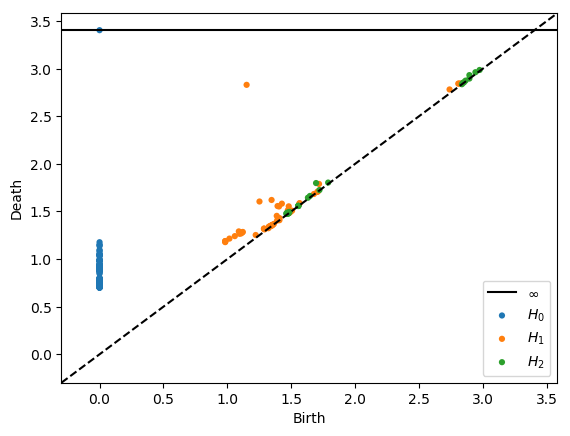

1
2
starting
['0.128', '0.157', '0.189', '0.226', '0.25', '0.257', '0.262', '0.265', '0.268', '0.269', '0.268', '0.266', '0.263', '0.26', '0.258', '0.257', '0.255', '0.252', '0.249', '0.246', '0.244', '0.241', '0.238', '0.235', '0.231', '0.227', '0.223', '0.219', '0.217', '0.213', '0.209', '0.205', '0.2', '0.196', '0.192', '0.19', '0.188', '0.188', '0.189', '0.191', '0.194', '0.198', '0.202', '0.206', '0.209', '0.212', '0.216', '0.219', '0.224', '0.229', '0.234', '0.237', '0.236', '0.233', '0.228', '0.222', '0.217', '0.213', '0.209', '0.206', '0.203', '0.2', '0.197', '0.195', '0.193', '0.191', '0.19', '0.189', '0.188', '0.188', '0.188', '0.188', '0.19', '0.192', '0.196', '0.199', '0.202', '0.204', '0.207', '0.209', '0.211', '0.212', '0.213', '0.214', '0.214', '0.216', '0.218', '0.22', '0.223', '0.225', '0.228', '0.23', '0.232', '0.234', '0.234', '0.234', '0.235', '0.236', '0.237', '0.239', '0.241', '0.242', '0.244', '0.246', '0.249', '0.252', '0.254', '0.255', '0.254', '0.251', '0.247'

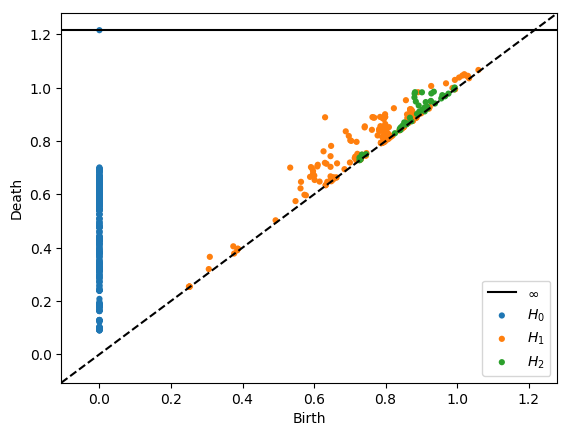

1
2
starting
['0.056', '0.073', '0.085', '0.093', '0.1', '0.107', '0.113', '0.117', '0.118', '0.117', '0.115', '0.113', '0.111', '0.109', '0.104', '0.101', '0.107', '0.121', '0.134', '0.147', '0.153', '0.156', '0.159', '0.162', '0.165', '0.167', '0.169', '0.171', '0.173', '0.176', '0.178', '0.181', '0.183', '0.186', '0.19', '0.194', '0.195', '0.191', '0.182', '0.165', '0.114', '0.038', '-0.055', '-0.158', '-0.244', '-0.283', '-0.295', '-0.284', '-0.252', '-0.192', '-0.113', '-0.016', '0.087', '0.18', '0.254', '0.278', '0.285', '0.289', '0.292', '0.294', '0.295', '0.292', '0.286', '0.278', '0.27', '0.264', '0.258', '0.253', '0.247', '0.242', '0.237', '0.232', '0.227', '0.223', '0.22', '0.215', '0.209', '0.195', '0.172', '0.16', '0.154', '0.15', '0.146', '0.142', '0.139', '0.137', '0.134', '0.131', '0.128', '0.125', '0.124', '0.122', '0.12', '0.114', '0.098', '0.077', '0.061', '0.05', '0.041', '0.032', '0.024', '0.016', '0.009', '0.003', '0.0', '-0.005', '-0.009', '-0.014', '-0.019', '-0

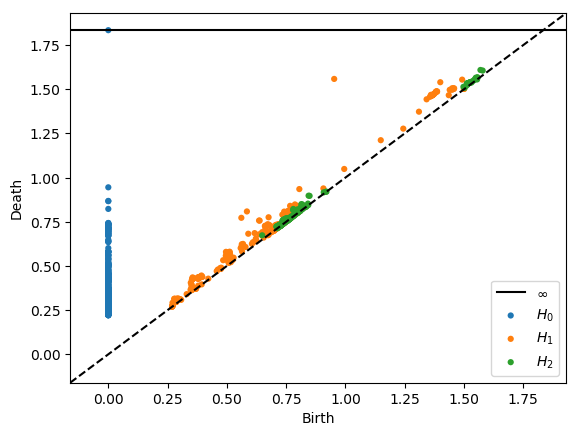

1
2
starting
['0.519', '0.619', '0.723', '0.827', '0.914', '0.956', '0.955', '0.934', '0.92', '0.9', '0.889', '0.883', '0.877', '0.873', '0.87', '0.866', '0.863', '0.86', '0.858', '0.856', '0.854', '0.852', '0.851', '0.849', '0.847', '0.845', '0.842', '0.84', '0.837', '0.834', '0.832', '0.83', '0.829', '0.829', '0.829', '0.83', '0.831', '0.833', '0.835', '0.837', '0.839', '0.842', '0.845', '0.849', '0.853', '0.859', '0.872', '0.885', '0.896', '0.906', '0.916', '0.926', '0.935', '0.939', '0.942', '0.944', '0.946', '0.948', '0.949', '0.951', '0.951', '0.95', '0.946', '0.94', '0.932', '0.921', '0.903', '0.888', '0.87', '0.844', '0.816', '0.788', '0.759', '0.729', '0.699', '0.67', '0.643', '0.616', '0.59', '0.564', '0.543', '0.527', '0.508', '0.495', '0.486', '0.48', '0.473', '0.467', '0.461', '0.454', '0.445', '0.432', '0.419', '0.407', '0.395', '0.383', '0.37', '0.356', '0.35', '0.347', '0.345', '0.343', '0.342', '0.341', '0.34', '0.338', '0.337', '0.335', '0.333', '0.331', '0.329', '0.3

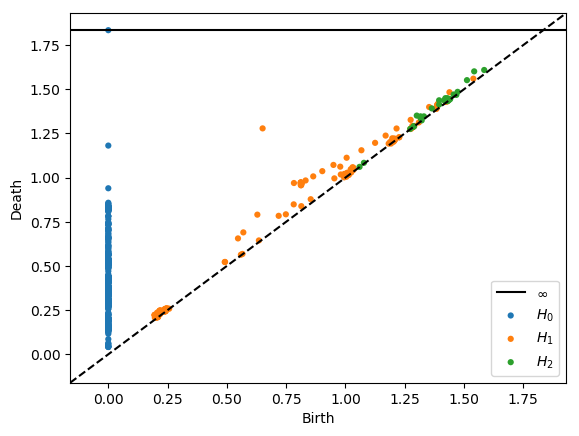

1
2
starting
['0.922', '0.694', '0.408', '0.139', '-0.052', '-0.127', '-0.108', '-0.043', '0.024', '0.06', '0.072', '0.064', '0.039', '0.015', '0.007', '0.005', '0.004', '0.003', '0.002', '0.001', '-0.001', '-0.003', '-0.005', '-0.007', '-0.009', '-0.01', '-0.008', '-0.004', '0.0', '0.005', '0.013', '0.021', '0.026', '0.029', '0.032', '0.034', '0.036', '0.038', '0.041', '0.043', '0.045', '0.047', '0.049', '0.051', '0.053', '0.054', '0.056', '0.058', '0.06', '0.061', '0.063', '0.066', '0.072', '0.085', '0.097', '0.111', '0.121', '0.127', '0.132', '0.138', '0.143', '0.149', '0.154', '0.159', '0.164', '0.168', '0.173', '0.18', '0.184', '0.188', '0.191', '0.181', '0.165', '0.15', '0.139', '0.131', '0.124', '0.114', '0.1', '0.09', '0.085', '0.082', '0.078', '0.074', '0.069', '0.064', '0.061', '0.057', '0.054', '0.051', '0.049', '0.046', '0.045', '0.043', '0.042', '0.04', '0.038', '0.033', '0.023', '0.01', '0.0', '-0.003', '-0.004', '-0.005', '-0.006', '-0.007', '-0.007', '-0.008', '-0.008',

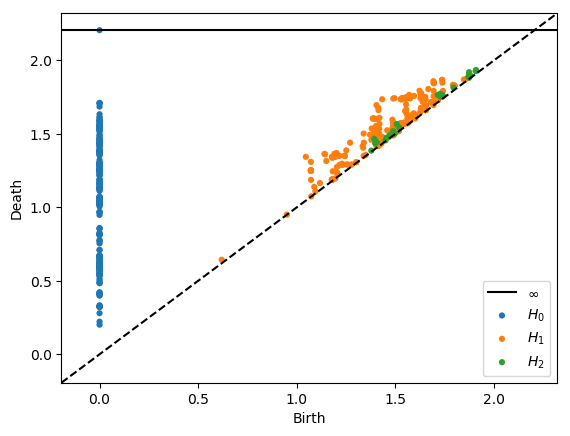

1
2
starting
['-0.266', '-0.316', '-0.367', '-0.407', '-0.423', '-0.423', '-0.401', '-0.367', '-0.329', '-0.305', '-0.289', '-0.288', '-0.3', '-0.334', '-0.385', '-0.447', '-0.515', '-0.579', '-0.602', '-0.614', '-0.622', '-0.609', '-0.569', '-0.51', '-0.438', '-0.366', '-0.303', '-0.249', '-0.218', '-0.186', '-0.156', '-0.136', '-0.12', '-0.102', '-0.085', '-0.071', '-0.058', '-0.045', '-0.034', '-0.023', '-0.014', '-0.006', '0.001', '0.005', '0.009', '0.012', '0.015', '0.017', '0.019', '0.019', '0.019', '0.017', '0.014', '0.01', '0.006', '0.002', '-0.001', '-0.005', '-0.009', '-0.013', '-0.017', '-0.021', '-0.025', '-0.028', '-0.032', '-0.034', '-0.037', '-0.038', '-0.039', '-0.04', '-0.041', '-0.042', '-0.043', '-0.044', '-0.046', '-0.049', '-0.052', '-0.055', '-0.056', '-0.053', '-0.047', '-0.039', '-0.029', '-0.018', '-0.002', '0.011', '0.024', '0.032', '0.037', '0.042', '0.046', '0.049', '0.051', '0.051', '0.05', '0.048', '0.044', '0.04', '0.034', '0.028', '0.021', '0.01', '-0.00

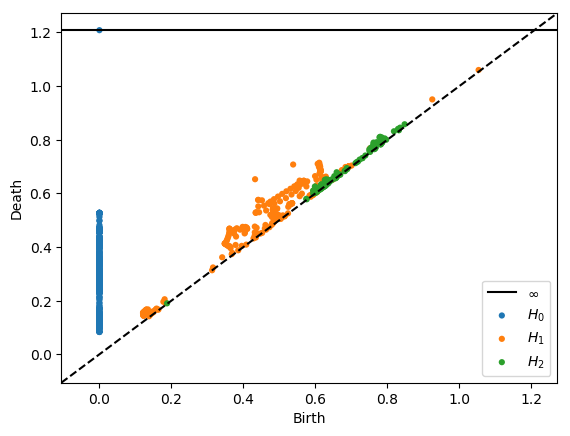

1
2
starting
['0.055', '0.054', '0.054', '0.054', '0.053', '0.053', '0.052', '0.052', '0.052', '0.05', '0.048', '0.044', '0.04', '0.036', '0.032', '0.029', '0.026', '0.024', '0.021', '0.02', '0.02', '0.021', '0.022', '0.022', '0.022', '0.022', '0.021', '0.021', '0.02', '0.02', '0.019', '0.018', '0.017', '0.018', '0.019', '0.02', '0.02', '0.02', '0.02', '0.021', '0.022', '0.024', '0.025', '0.025', '0.024', '0.023', '0.021', '0.02', '0.018', '0.016', '0.013', '0.011', '0.007', '0.003', '0.0', '-0.005', '-0.042', '-0.114', '-0.214', '-0.343', '-0.487', '-0.634', '-0.769', '-0.867', '-0.882', '-0.853', '-0.713', '-0.502', '-0.257', '-0.035', '0.114', '0.163', '0.181', '0.181', '0.167', '0.146', '0.117', '0.085', '0.051', '0.029', '0.019', '0.011', '0.004', '-0.003', '-0.01', '-0.015', '-0.02', '-0.027', '-0.038', '-0.048', '-0.059', '-0.063', '-0.064', '-0.065', '-0.067', '-0.07', '-0.072', '-0.073', '-0.075', '-0.076', '-0.076', '-0.076', '-0.076', '-0.076', '-0.076', '-0.075', '-0.075', 

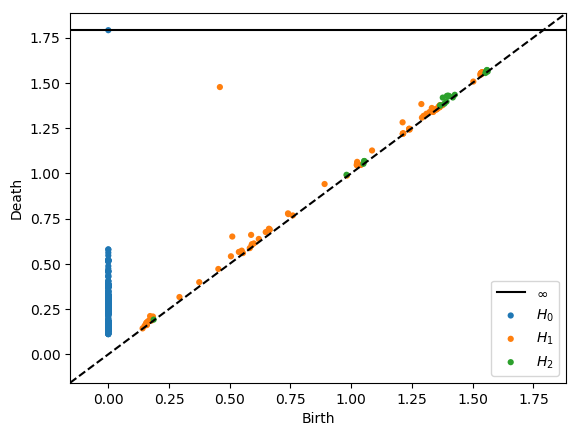

1
2
starting
['-0.07', '-0.067', '-0.064', '-0.063', '-0.061', '-0.058', '-0.055', '-0.051', '-0.048', '-0.046', '-0.044', '-0.043', '-0.042', '-0.041', '-0.041', '-0.042', '-0.044', '-0.046', '-0.048', '-0.05', '-0.053', '-0.055', '-0.058', '-0.063', '-0.069', '-0.073', '-0.077', '-0.082', '-0.09', '-0.09', '-0.079', '-0.07', '-0.063', '-0.058', '-0.055', '-0.055', '-0.055', '-0.055', '-0.054', '-0.053', '-0.052', '-0.052', '-0.052', '-0.052', '-0.051', '-0.05', '-0.05', '-0.05', '-0.05', '-0.051', '-0.052', '-0.051', '-0.051', '-0.05', '-0.05', '-0.05', '-0.049', '-0.048', '-0.045', '-0.042', '-0.04', '-0.038', '-0.036', '-0.034', '-0.031', '-0.027', '-0.025', '-0.025', '-0.026', '-0.028', '-0.03', '-0.031', '-0.031', '-0.033', '-0.035', '-0.037', '-0.037', '-0.033', '-0.027', '-0.022', '-0.019', '-0.017', '-0.015', '-0.013', '-0.01', '-0.007', '-0.004', '-0.002', '0.0', '0.0', '0.002', '0.004', '0.007', '0.01', '0.014', '0.023', '0.032', '0.043', '0.055', '0.07', '0.085', '0.096', '

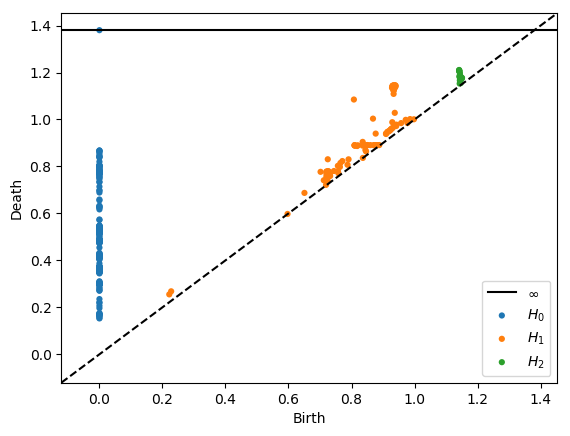

1
2
starting
['-0.234', '-0.264', '-0.289', '-0.307', '-0.321', '-0.333', '-0.342', '-0.35', '-0.354', '-0.351', '-0.343', '-0.336', '-0.329', '-0.324', '-0.324', '-0.334', '-0.346', '-0.354', '-0.36', '-0.366', '-0.371', '-0.377', '-0.383', '-0.39', '-0.395', '-0.402', '-0.411', '-0.424', '-0.437', '-0.452', '-0.476', '-0.504', '-0.523', '-0.536', '-0.521', '-0.496', '-0.472', '-0.463', '-0.458', '-0.455', '-0.452', '-0.449', '-0.446', '-0.441', '-0.436', '-0.43', '-0.424', '-0.419', '-0.415', '-0.411', '-0.407', '-0.403', '-0.399', '-0.394', '-0.39', '-0.386', '-0.382', '-0.378', '-0.373', '-0.37', '-0.367', '-0.365', '-0.363', '-0.361', '-0.36', '-0.358', '-0.354', '-0.35', '-0.345', '-0.342', '-0.34', '-0.341', '-0.345', '-0.349', '-0.355', '-0.36', '-0.365', '-0.372', '-0.38', '-0.386', '-0.389', '-0.387', '-0.383', '-0.376', '-0.368', '-0.356', '-0.337', '-0.319', '-0.301', '-0.283', '-0.265', '-0.247', '-0.23', '-0.211', '-0.192', '-0.174', '-0.161', '-0.151', '-0.142', '-0.13',

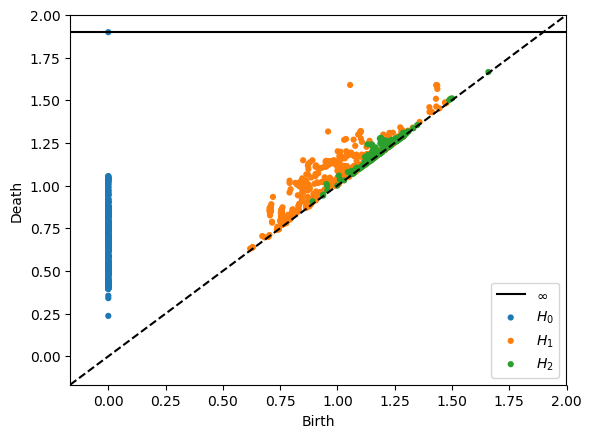

1
2
starting
['-1.028', '-1.225', '-1.418', '-1.599', '-1.747', '-1.808', '-1.797', '-1.728', '-1.687', '-1.643', '-1.596', '-1.577', '-1.564', '-1.531', '-1.489', '-1.444', '-1.419', '-1.397', '-1.373', '-1.344', '-1.318', '-1.299', '-1.285', '-1.27', '-1.249', '-1.222', '-1.194', '-1.168', '-1.128', '-1.078', '-1.028', '-0.984', '-0.941', '-0.892', '-0.84', '-0.791', '-0.761', '-0.731', '-0.701', '-0.684', '-0.676', '-0.67', '-0.665', '-0.66', '-0.656', '-0.652', '-0.647', '-0.638', '-0.624', '-0.604', '-0.587', '-0.573', '-0.56', '-0.547', '-0.538', '-0.53', '-0.523', '-0.517', '-0.513', '-0.51', '-0.506', '-0.501', '-0.496', '-0.49', '-0.479', '-0.465', '-0.441', '-0.407', '-0.35', '-0.281', '-0.197', '-0.11', '-0.035', '0.007', '0.023', '0.023', '0.007', '-0.035', '-0.087', '-0.147', '-0.212', '-0.272', '-0.308', '-0.32', '-0.325', '-0.319', '-0.306', '-0.294', '-0.28', '-0.266', '-0.253', '-0.241', '-0.23', '-0.219', '-0.208', '-0.197', '-0.183', '-0.165', '-0.149', '-0.137', '-0

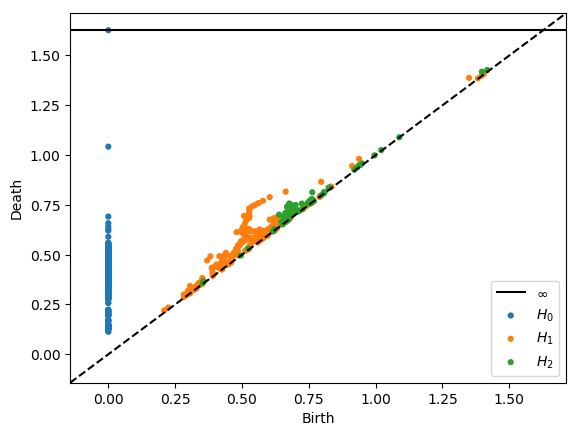

1
2
starting
['-0.069', '-0.089', '-0.108', '-0.125', '-0.135', '-0.142', '-0.147', '-0.152', '-0.156', '-0.161', '-0.167', '-0.174', '-0.181', '-0.189', '-0.197', '-0.208', '-0.217', '-0.222', '-0.222', '-0.222', '-0.222', '-0.223', '-0.224', '-0.224', '-0.224', '-0.224', '-0.219', '-0.212', '-0.204', '-0.197', '-0.191', '-0.185', '-0.179', '-0.174', '-0.168', '-0.162', '-0.156', '-0.152', '-0.148', '-0.144', '-0.14', '-0.136', '-0.132', '-0.128', '-0.125', '-0.122', '-0.12', '-0.118', '-0.116', '-0.113', '-0.11', '-0.107', '-0.099', '-0.094', '-0.099', '-0.114', '-0.156', '-0.207', '-0.268', '-0.334', '-0.396', '-0.418', '-0.433', '-0.433', '-0.403', '-0.358', '-0.306', '-0.253', '-0.2', '-0.147', '-0.128', '-0.119', '-0.112', '-0.117', '-0.121', '-0.122', '-0.124', '-0.124', '-0.125', '-0.125', '-0.124', '-0.124', '-0.124', '-0.123', '-0.122', '-0.12', '-0.117', '-0.115', '-0.114', '-0.112', '-0.111', '-0.11', '-0.109', '-0.109', '-0.113', '-0.119', '-0.125', '-0.132', '-0.136', '-0

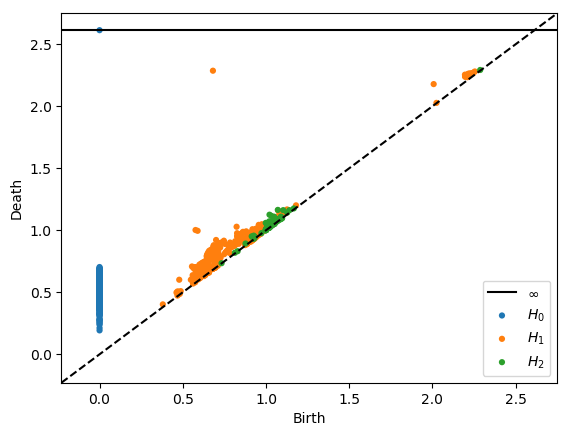

1
2
starting
['-0.001', '0.0', '0.0', '0.002', '0.004', '0.007', '0.017', '0.051', '0.114', '0.211', '0.343', '0.497', '0.638', '0.698', '0.687', '0.568', '0.35', '0.107', '-0.094', '-0.21', '-0.234', '-0.2', '-0.152', '-0.118', '-0.101', '-0.085', '-0.067', '-0.057', '-0.053', '-0.05', '-0.047', '-0.046', '-0.045', '-0.044', '-0.044', '-0.044', '-0.045', '-0.045', '-0.046', '-0.046', '-0.047', '-0.048', '-0.05', '-0.052', '-0.053', '-0.053', '-0.052', '-0.051', '-0.05', '-0.049', '-0.047', '-0.044', '-0.044', '-0.046', '-0.048', '-0.05', '-0.051', '-0.051', '-0.048', '-0.042', '-0.033', '-0.017', '-0.01', '-0.008', '-0.006', '-0.004', '-0.002', '0.0', '0.0', '0.001', '0.002', '0.003', '0.004', '0.005', '0.006', '0.006', '0.007', '0.008', '0.009', '0.011', '0.013', '0.017', '0.021', '0.026', '0.033', '0.04', '0.043', '0.046', '0.048', '0.051', '0.053', '0.055', '0.057', '0.059', '0.06', '0.061', '0.062', '0.062', '0.062', '0.062', '0.061', '0.06', '0.06', '0.058', '0.057', '0.055', '0.

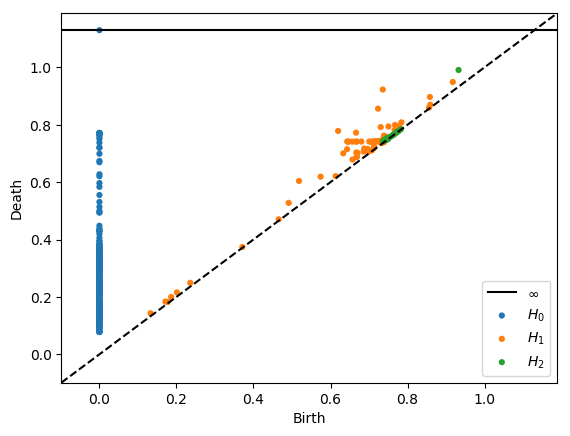

1
2
starting
['0.104', '0.101', '0.099', '0.097', '0.094', '0.091', '0.088', '0.086', '0.084', '0.082', '0.08', '0.078', '0.077', '0.076', '0.074', '0.073', '0.071', '0.07', '0.07', '0.069', '0.068', '0.067', '0.066', '0.064', '0.062', '0.06', '0.058', '0.056', '0.053', '0.05', '0.046', '0.043', '0.038', '0.032', '0.027', '0.023', '0.016', '0.007', '0.0', '-0.007', '-0.014', '-0.022', '-0.029', '-0.035', '-0.041', '-0.046', '-0.049', '-0.051', '-0.054', '-0.055', '-0.057', '-0.057', '-0.057', '-0.057', '-0.056', '-0.053', '-0.051', '-0.048', '-0.044', '-0.04', '-0.034', '-0.028', '-0.022', '-0.017', '-0.012', '-0.007', '-0.002', '0.0', '0.003', '0.005', '0.007', '0.008', '0.009', '0.01', '0.01', '0.011', '0.011', '0.012', '0.012', '0.011', '0.011', '0.01', '0.009', '0.009', '0.008', '0.007', '0.006', '0.005', '0.004', '0.004', '0.003', '0.003', '0.003', '0.003', '0.003', '0.003', '0.004', '0.004', '0.005', '0.005', '0.006', '0.006', '0.007', '0.008', '0.008', '0.008', '0.008', '0.008',

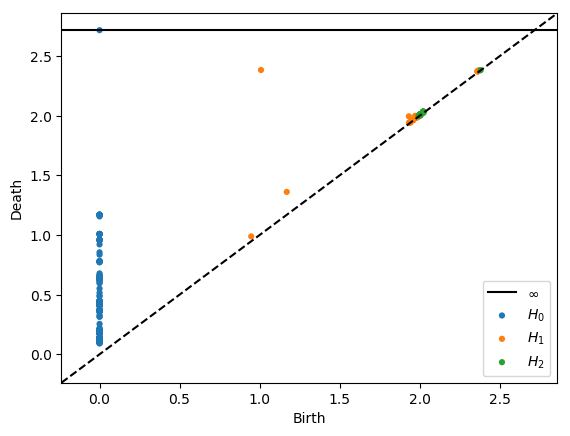

1
2
starting
['-0.062', '-0.072', '-0.081', '-0.088', '-0.088', '-0.078', '-0.061', '-0.041', '-0.014', '0.004', '0.028', '0.059', '0.081', '0.095', '0.104', '0.105', '0.099', '0.091', '0.084', '0.08', '0.075', '0.07', '0.065', '0.061', '0.054', '0.045', '0.032', '0.013', '-0.001', '-0.011', '-0.018', '-0.026', '-0.038', '-0.052', '-0.061', '-0.069', '-0.076', '-0.081', '-0.084', '-0.085', '-0.087', '-0.087', '-0.089', '-0.091', '-0.094', '-0.085', '-0.075', '-0.068', '-0.07', '-0.084', '-0.091', '-0.096', '-0.1', '-0.103', '-0.103', '-0.103', '-0.1', '-0.095', '-0.089', '-0.082', '-0.076', '-0.07', '-0.063', '-0.058', '-0.054', '-0.053', '-0.055', '-0.058', '-0.064', '-0.07', '-0.077', '-0.086', '-0.096', '-0.107', '-0.115', '-0.121', '-0.126', '-0.131', '-0.137', '-0.145', '-0.15', '-0.142', '-0.127', '-0.116', '-0.107', '-0.099', '-0.091', '-0.083', '-0.075', '-0.067', '-0.059', '-0.052', '-0.047', '-0.047', '-0.049', '-0.054', '-0.061', '-0.07', '-0.094', '-0.118', '-0.134', '-0.14

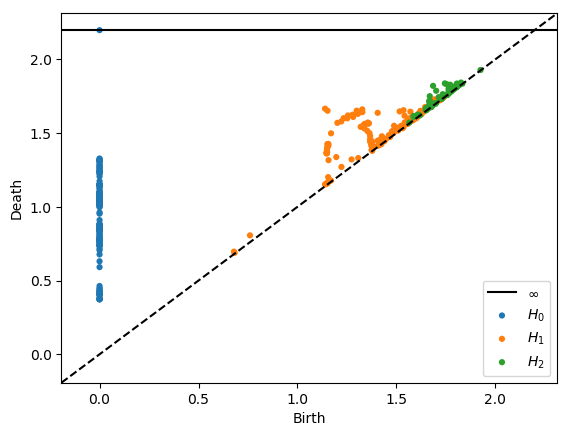

1
2
starting
['-0.905', '-0.896', '-0.89', '-0.888', '-0.891', '-0.899', '-0.912', '-0.93', '-0.954', '-0.973', '-0.989', '-1.004', '-1.01', '-1.005', '-0.992', '-0.955', '-0.902', '-0.834', '-0.75', '-0.653', '-0.552', '-0.46', '-0.383', '-0.359', '-0.373', '-0.411', '-0.534', '-0.713', '-0.93', '-1.129', '-1.236', '-1.28', '-1.288', '-1.277', '-1.264', '-1.251', '-1.239', '-1.226', '-1.186', '-1.095', '-0.973', '-0.845', '-0.735', '-0.653', '-0.589', '-0.548', '-0.509', '-0.469', '-0.429', '-0.389', '-0.348', '-0.31', '-0.275', '-0.238', '-0.208', '-0.187', '-0.165', '-0.15', '-0.139', '-0.128', '-0.119', '-0.107', '-0.086', '-0.057', '-0.031', '-0.004', '0.017', '0.035', '0.057', '0.086', '0.12', '0.153', '0.185', '0.211', '0.231', '0.253', '0.281', '0.319', '0.353', '0.378', '0.398', '0.406', '0.409', '0.409', '0.41', '0.412', '0.415', '0.419', '0.423', '0.427', '0.43', '0.435', '0.439', '0.444', '0.449', '0.458', '0.471', '0.484', '0.494', '0.502', '0.507', '0.507', '0.507', '0.50

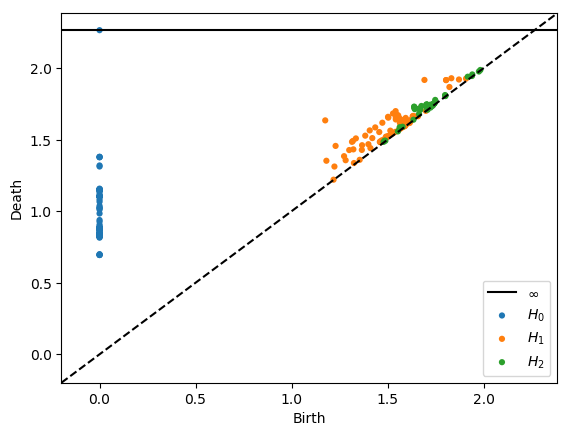

1
2
starting
['-0.081', '-0.096', '-0.107', '-0.116', '-0.123', '-0.129', '-0.133', '-0.136', '-0.138', '-0.139', '-0.141', '-0.142', '-0.144', '-0.144', '-0.143', '-0.138', '-0.13', '-0.122', '-0.115', '-0.11', '-0.105', '-0.101', '-0.098', '-0.096', '-0.093', '-0.089', '-0.085', '-0.081', '-0.077', '-0.075', '-0.073', '-0.072', '-0.071', '-0.069', '-0.067', '-0.066', '-0.064', '-0.062', '-0.059', '-0.055', '-0.051', '-0.049', '-0.048', '-0.048', '-0.049', '-0.051', '-0.054', '-0.058', '-0.064', '-0.065', '-0.06', '-0.056', '-0.053', '-0.051', '-0.05', '-0.049', '-0.047', '-0.045', '-0.043', '-0.041', '-0.04', '-0.04', '-0.039', '-0.036', '-0.033', '-0.038', '-0.049', '-0.059', '-0.071', '-0.077', '-0.078', '-0.079', '-0.08', '-0.083', '-0.073', '-0.066', '-0.062', '-0.058', '-0.055', '-0.054', '-0.054', '-0.056', '-0.06', '-0.064', '-0.07', '-0.076', '-0.086', '-0.095', '-0.095', '-0.088', '-0.079', '-0.07', '-0.06', '-0.05', '-0.041', '-0.031', '-0.013', '0.012', '0.031', '0.046', '

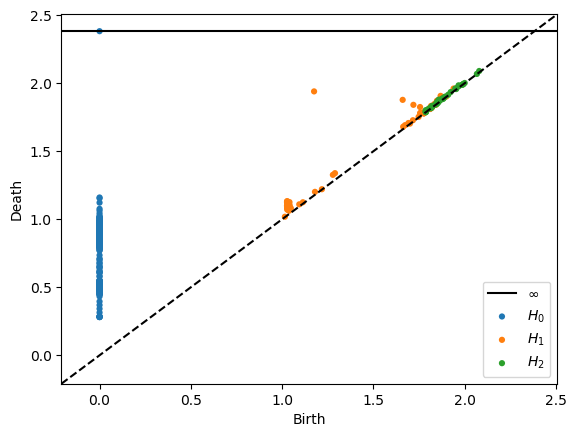

1
2
starting
['0.275', '0.328', '0.382', '0.435', '0.483', '0.5', '0.511', '0.518', '0.525', '0.532', '0.535', '0.531', '0.521', '0.494', '0.452', '0.4', '0.366', '0.329', '0.296', '0.273', '0.258', '0.253', '0.26', '0.276', '0.294', '0.315', '0.333', '0.35', '0.368', '0.388', '0.399', '0.406', '0.411', '0.416', '0.419', '0.42', '0.42', '0.42', '0.419', '0.417', '0.416', '0.415', '0.413', '0.411', '0.409', '0.407', '0.406', '0.405', '0.405', '0.405', '0.406', '0.407', '0.409', '0.41', '0.412', '0.413', '0.414', '0.415', '0.415', '0.417', '0.418', '0.418', '0.418', '0.418', '0.418', '0.417', '0.416', '0.415', '0.414', '0.412', '0.41', '0.407', '0.403', '0.397', '0.385', '0.371', '0.355', '0.33', '0.297', '0.276', '0.263', '0.254', '0.245', '0.237', '0.232', '0.227', '0.224', '0.22', '0.216', '0.211', '0.205', '0.199', '0.193', '0.188', '0.184', '0.18', '0.177', '0.173', '0.169', '0.165', '0.161', '0.157', '0.154', '0.152', '0.149', '0.146', '0.142', '0.138', '0.13', '0.114', '0.101', '0

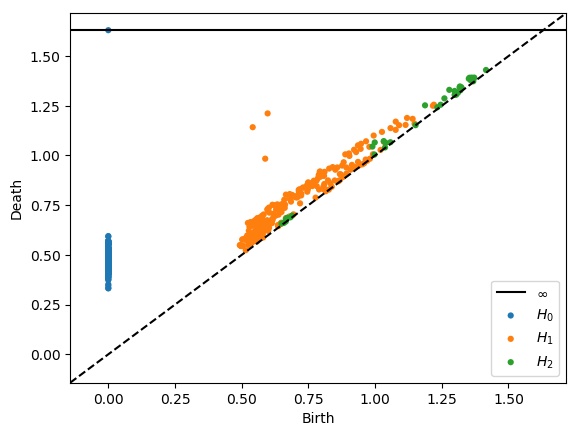

1
2
starting
['-0.477', '-0.569', '-0.664', '-0.758', '-0.837', '-0.863', '-0.87', '-0.861', '-0.845', '-0.822', '-0.804', '-0.795', '-0.788', '-0.781', '-0.772', '-0.764', '-0.755', '-0.747', '-0.741', '-0.735', '-0.729', '-0.724', '-0.719', '-0.71', '-0.695', '-0.679', '-0.663', '-0.647', '-0.629', '-0.611', '-0.594', '-0.577', '-0.56', '-0.544', '-0.528', '-0.52', '-0.516', '-0.512', '-0.508', '-0.506', '-0.505', '-0.505', '-0.507', '-0.511', '-0.517', '-0.524', '-0.532', '-0.543', '-0.562', '-0.577', '-0.589', '-0.609', '-0.635', '-0.66', '-0.686', '-0.707', '-0.723', '-0.74', '-0.749', '-0.755', '-0.76', '-0.764', '-0.766', '-0.767', '-0.767', '-0.764', '-0.76', '-0.754', '-0.748', '-0.743', '-0.737', '-0.732', '-0.726', '-0.72', '-0.714', '-0.709', '-0.704', '-0.7', '-0.696', '-0.691', '-0.685', '-0.677', '-0.664', '-0.652', '-0.64', '-0.63', '-0.62', '-0.611', '-0.602', '-0.593', '-0.586', '-0.58', '-0.574', '-0.569', '-0.563', '-0.557', '-0.552', '-0.548', '-0.544', '-0.542', '

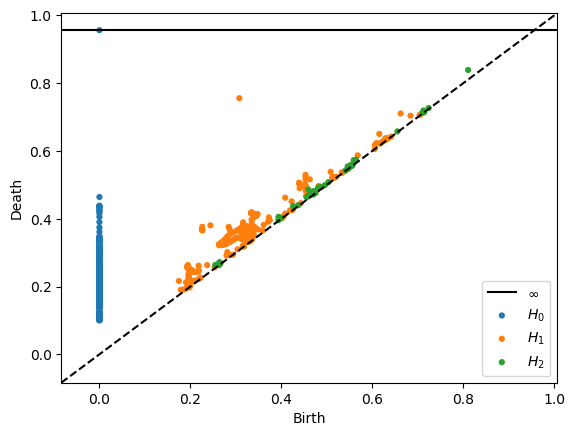

1
2
starting
['0.182', '0.155', '0.131', '0.058', '0.306', '0.177', '-0.055', '-0.331', '-0.49', '-0.696', '-0.714', '-0.71', '-0.666', '-0.6', '-0.496', '-0.37', '-0.123', '-0.078', '-0.178', '-0.179', '-0.115', '-0.11', '-0.18', '-0.147', '-0.125', '-0.13', '-0.163', '-0.17', '-0.159', '-0.138', '-0.138', '-0.155', '-0.157', '-0.131', '-0.108', '-0.101', '-0.095', '-0.089', '-0.07', '-0.057', '-0.053', '-0.051', '-0.046', '-0.039', '-0.034', '-0.03', '-0.027', '-0.025', '-0.025', '-0.025', '-0.027', '-0.03', '-0.033', '-0.036', '-0.04', '-0.044', '-0.047', '-0.051', '-0.053', '-0.055', '-0.054', '-0.053', '-0.051', '-0.049', '-0.047', '-0.045', '-0.044', '-0.044', '-0.045', '-0.046', '-0.048', '-0.051', '-0.055', '-0.057', '-0.055', '-0.047', '-0.024', '0.015', '0.07', '0.128', '0.171', '0.177', '0.165', '0.114', '0.044', '-0.035', '-0.118', '-0.197', '-0.268', '-0.326', '-0.346', '-0.342', '-0.302', '-0.241', '-0.178', '-0.126', '-0.09', '-0.068', '-0.062', '-0.057', '-0.051', '-0.0

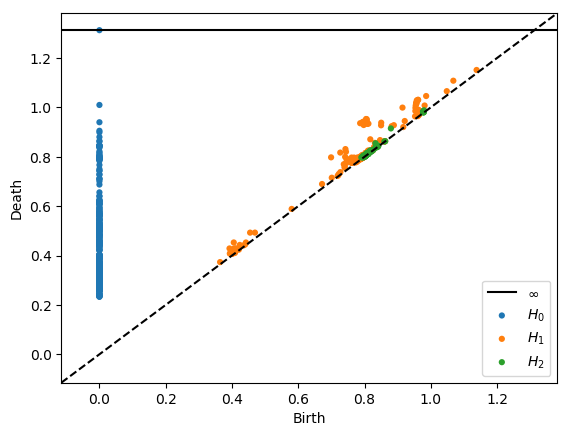

1
2
starting
['0.027', '0.029', '0.03', '0.032', '0.034', '0.037', '0.04', '0.043', '0.046', '0.049', '0.052', '0.056', '0.059', '0.062', '0.063', '0.065', '0.067', '0.071', '0.076', '0.089', '0.113', '0.122', '0.125', '0.129', '0.134', '0.137', '0.139', '0.14', '0.14', '0.14', '0.14', '0.14', '0.14', '0.139', '0.137', '0.135', '0.133', '0.131', '0.13', '0.128', '0.125', '0.121', '0.116', '0.111', '0.104', '0.097', '0.089', '0.079', '0.068', '0.058', '0.046', '0.026', '0.0', '-0.016', '-0.025', '-0.033', '-0.039', '-0.046', '-0.059', '-0.074', '-0.082', '-0.088', '-0.09', '-0.089', '-0.088', '-0.088', '-0.087', '-0.086', '-0.085', '-0.085', '-0.086', '-0.091', '-0.096', '-0.101', '-0.104', '-0.108', '-0.113', '-0.116', '-0.12', '-0.123', '-0.125', '-0.127', '-0.128', '-0.128', '-0.127', '-0.126', '-0.124', '-0.122', '-0.119', '-0.116', '-0.112', '-0.109', '-0.105', '-0.102', '-0.096', '-0.089', '-0.083', '-0.078', '-0.075', '-0.072', '-0.07', '-0.068', '-0.065', '-0.061', '-0.058', '-0

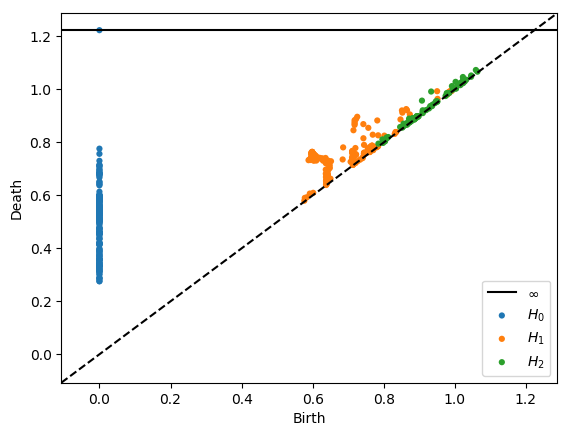

1
2
starting
['0.4', '0.484', '0.571', '0.658', '0.731', '0.752', '0.759', '0.757', '0.742', '0.73', '0.721', '0.71', '0.697', '0.683', '0.676', '0.671', '0.665', '0.661', '0.659', '0.655', '0.653', '0.651', '0.649', '0.647', '0.645', '0.644', '0.644', '0.644', '0.644', '0.643', '0.641', '0.64', '0.639', '0.638', '0.636', '0.633', '0.63', '0.626', '0.621', '0.616', '0.612', '0.607', '0.601', '0.594', '0.586', '0.578', '0.571', '0.565', '0.558', '0.55', '0.539', '0.527', '0.514', '0.508', '0.503', '0.5', '0.497', '0.494', '0.492', '0.489', '0.486', '0.482', '0.479', '0.475', '0.472', '0.469', '0.466', '0.462', '0.459', '0.457', '0.454', '0.451', '0.447', '0.443', '0.44', '0.437', '0.435', '0.432', '0.43', '0.426', '0.421', '0.415', '0.404', '0.393', '0.381', '0.373', '0.368', '0.365', '0.362', '0.358', '0.354', '0.349', '0.345', '0.342', '0.338', '0.332', '0.324', '0.311', '0.299', '0.288', '0.282', '0.278', '0.274', '0.271', '0.27', '0.27', '0.274', '0.28', '0.287', '0.294', '0.299', '

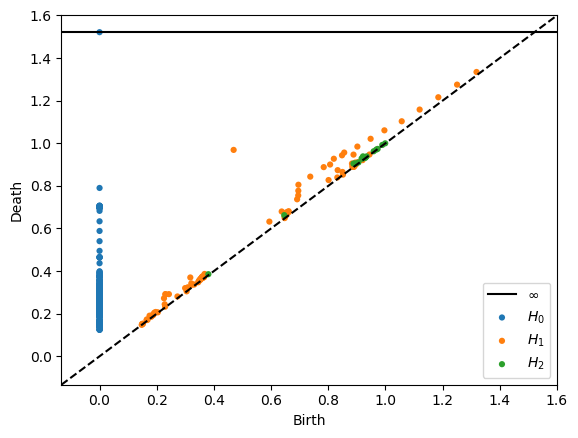

1
2
starting
['-0.004', '-0.001', '0.003', '0.009', '0.008', '-0.002', '-0.019', '-0.039', '-0.064', '-0.077', '-0.084', '-0.09', '-0.096', '-0.101', '-0.104', '-0.105', '-0.103', '-0.098', '-0.094', '-0.088', '-0.079', '-0.08', '-0.098', '-0.108', '-0.115', '-0.121', '-0.127', '-0.13', '-0.131', '-0.128', '-0.123', '-0.114', '-0.103', '-0.085', '-0.059', '-0.052', '-0.047', '-0.043', '-0.039', '-0.034', '-0.027', '-0.019', '-0.014', '-0.009', '-0.005', '-0.001', '0.0', '0.0', '-0.002', '-0.006', '-0.012', '-0.018', '-0.023', '-0.03', '-0.04', '-0.05', '-0.055', '-0.052', '-0.042', '-0.029', '-0.017', '-0.002', '0.01', '0.017', '0.022', '0.031', '0.042', '0.042', '0.026', '0.015', '0.005', '-0.003', '-0.01', '-0.01', '-0.005', '0.002', '0.009', '0.014', '0.018', '0.024', '0.029', '0.035', '0.038', '0.039', '0.037', '0.032', '0.025', '0.019', '0.012', '0.005', '-0.004', '-0.015', '-0.027', '-0.04', '-0.052', '-0.062', '-0.072', '-0.083', '-0.09', '-0.09', '-0.085', '-0.076', '-0.066', '

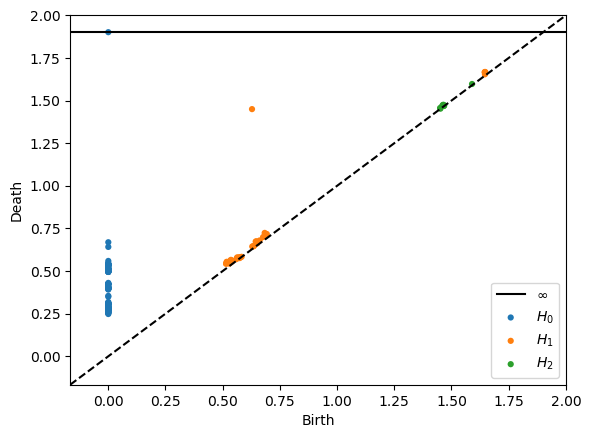

1
2
starting
['-0.057', '-0.056', '-0.054', '-0.052', '-0.051', '-0.051', '-0.051', '-0.051', '-0.052', '-0.052', '-0.051', '-0.051', '-0.05', '-0.049', '-0.047', '-0.045', '-0.044', '-0.043', '-0.043', '-0.042', '-0.042', '-0.042', '-0.042', '-0.042', '-0.043', '-0.043', '-0.043', '-0.041', '-0.039', '-0.036', '-0.033', '-0.03', '-0.027', '-0.026', '-0.028', '-0.033', '-0.041', '-0.052', '-0.066', '-0.081', '-0.089', '-0.096', '-0.101', '-0.105', '-0.108', '-0.108', '-0.106', '-0.102', '-0.098', '-0.094', '-0.09', '-0.085', '-0.079', '-0.073', '-0.068', '-0.063', '-0.057', '-0.05', '-0.041', '-0.034', '-0.028', '-0.023', '-0.018', '-0.015', '-0.014', '-0.017', '-0.021', '-0.023', '-0.026', '-0.028', '-0.03', '-0.031', '-0.03', '-0.029', '-0.027', '-0.025', '-0.024', '-0.023', '-0.022', '-0.02', '-0.019', '-0.017', '-0.015', '-0.014', '-0.012', '-0.01', '-0.008', '-0.006', '-0.004', '-0.001', '0.001', '0.006', '0.016', '0.023', '0.027', '0.03', '0.031', '0.033', '0.034', '0.036', '0.03

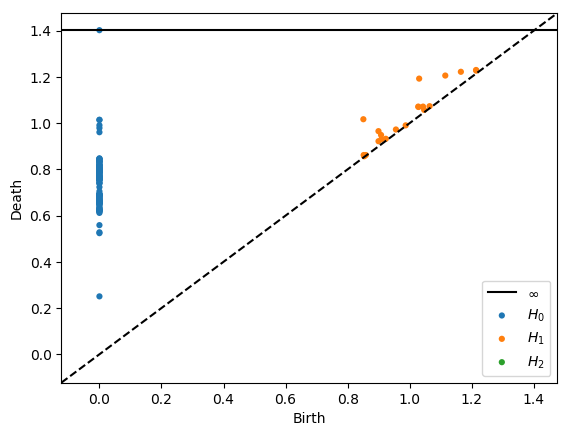

1
2
starting
['-0.02', '-0.019', '-0.018', '-0.016', '-0.015', '-0.014', '-0.012', '-0.01', '-0.007', '0.0', '0.019', '0.03', '0.036', '0.04', '0.044', '0.046', '0.046', '0.045', '0.041', '0.036', '0.03', '0.023', '0.017', '0.008', '-0.001', '-0.009', '-0.015', '-0.02', '-0.023', '-0.025', '-0.028', '-0.031', '-0.033', '-0.034', '-0.035', '-0.035', '-0.035', '-0.034', '-0.034', '-0.032', '-0.031', '-0.028', '-0.025', '-0.022', '-0.017', '-0.007', '-0.007', '-0.021', '-0.034', '-0.046', '-0.051', '-0.048', '-0.039', '-0.015', '0.038', '0.126', '0.244', '0.383', '0.524', '0.639', '0.711', '0.72', '0.691', '0.579', '0.431', '0.267', '0.122', '0.017', '-0.039', '-0.064', '-0.078', '-0.087', '-0.096', '-0.104', '-0.111', '-0.118', '-0.122', '-0.121', '-0.114', '-0.104', '-0.095', '-0.086', '-0.077', '-0.07', '-0.062', '-0.047', '-0.023', '-0.009', '0.0', '0.005', '0.007', '0.004', '-0.002', '-0.011', '-0.018', '-0.026', '-0.034', '-0.037', '-0.034', '-0.027', '-0.019', '-0.014', '-0.01', '-

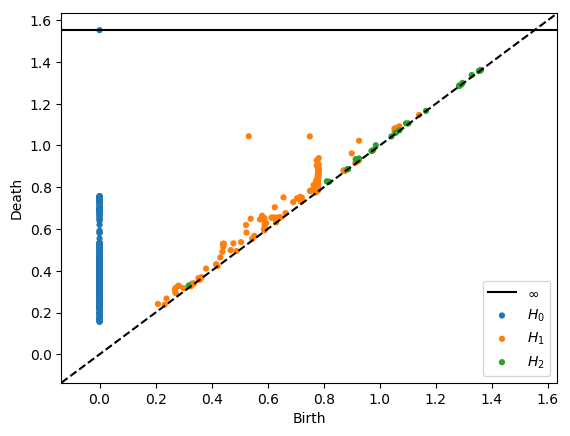

1
2
starting
['0.141', '0.172', '0.205', '0.265', '0.323', '0.351', '0.372', '0.399', '0.416', '0.423', '0.428', '0.434', '0.44', '0.445', '0.451', '0.459', '0.474', '0.501', '0.528', '0.556', '0.587', '0.62', '0.64', '0.651', '0.659', '0.663', '0.664', '0.661', '0.655', '0.646', '0.631', '0.607', '0.585', '0.561', '0.536', '0.507', '0.475', '0.44', '0.403', '0.371', '0.341', '0.317', '0.308', '0.303', '0.299', '0.296', '0.295', '0.293', '0.293', '0.293', '0.295', '0.298', '0.303', '0.309', '0.316', '0.325', '0.336', '0.355', '0.371', '0.384', '0.4', '0.418', '0.436', '0.46', '0.49', '0.519', '0.545', '0.585', '0.631', '0.68', '0.708', '0.732', '0.75', '0.773', '0.794', '0.811', '0.823', '0.831', '0.84', '0.851', '0.866', '0.887', '0.913', '0.933', '0.946', '0.954', '0.959', '0.964', '0.969', '0.972', '0.966', '0.953', '0.941', '0.928', '0.915', '0.903', '0.891', '0.878', '0.867', '0.858', '0.847', '0.833', '0.817', '0.796', '0.771', '0.751', '0.736', '0.721', '0.701', '0.681', '0.671'

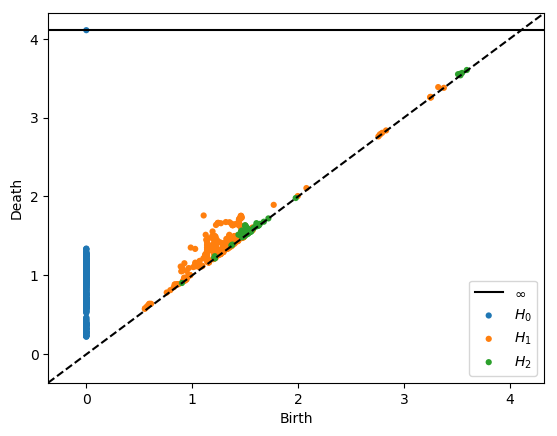

1
2
starting
['-0.059', '-0.059', '-0.058', '-0.057', '-0.057', '-0.057', '-0.056', '-0.056', '-0.055', '-0.055', '-0.055', '-0.055', '-0.055', '-0.056', '-0.056', '-0.057', '-0.058', '-0.059', '-0.06', '-0.06', '-0.06', '-0.06', '-0.06', '-0.06', '-0.06', '-0.06', '-0.06', '-0.06', '-0.061', '-0.062', '-0.062', '-0.063', '-0.064', '-0.064', '-0.065', '-0.066', '-0.066', '-0.066', '-0.067', '-0.066', '-0.067', '-0.067', '-0.068', '-0.068', '-0.068', '-0.068', '-0.067', '-0.067', '-0.067', '-0.067', '-0.066', '-0.065', '-0.064', '-0.064', '-0.064', '-0.064', '-0.064', '-0.064', '-0.064', '-0.063', '-0.064', '-0.064', '-0.065', '-0.066', '-0.067', '-0.068', '-0.068', '-0.069', '-0.07', '-0.07', '-0.07', '-0.07', '-0.069', '-0.066', '-0.062', '-0.057', '-0.052', '-0.048', '-0.044', '-0.041', '-0.038', '-0.035', '-0.033', '-0.032', '-0.031', '-0.029', '-0.028', '-0.026', '-0.025', '-0.024', '-0.023', '-0.023', '-0.023', '-0.022', '-0.022', '-0.021', '-0.021', '-0.021', '-0.022', '-0.022', 

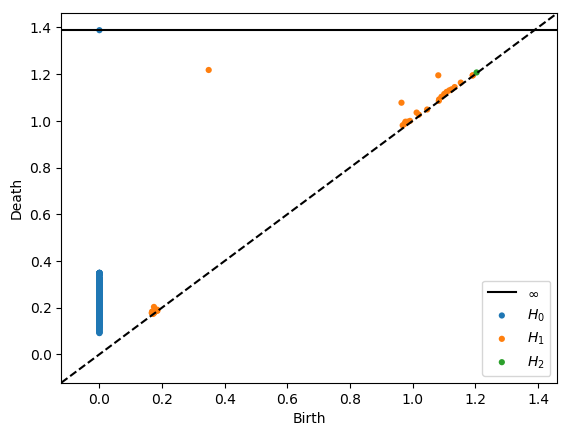

1
2
starting
['-0.39', '-0.462', '-0.542', '-0.626', '-0.695', '-0.719', '-0.708', '-0.693', '-0.68', '-0.665', '-0.651', '-0.64', '-0.626', '-0.607', '-0.592', '-0.579', '-0.567', '-0.56', '-0.556', '-0.553', '-0.549', '-0.547', '-0.544', '-0.541', '-0.537', '-0.532', '-0.527', '-0.52', '-0.509', '-0.491', '-0.477', '-0.463', '-0.449', '-0.432', '-0.416', '-0.404', '-0.391', '-0.378', '-0.366', '-0.355', '-0.347', '-0.343', '-0.339', '-0.336', '-0.333', '-0.33', '-0.329', '-0.328', '-0.33', '-0.336', '-0.343', '-0.352', '-0.361', '-0.373', '-0.386', '-0.398', '-0.41', '-0.427', '-0.447', '-0.461', '-0.472', '-0.481', '-0.493', '-0.51', '-0.518', '-0.524', '-0.53', '-0.535', '-0.539', '-0.543', '-0.547', '-0.549', '-0.551', '-0.551', '-0.55', '-0.548', '-0.544', '-0.54', '-0.535', '-0.53', '-0.526', '-0.522', '-0.518', '-0.514', '-0.51', '-0.505', '-0.5', '-0.495', '-0.49', '-0.485', '-0.48', '-0.476', '-0.472', '-0.47', '-0.468', '-0.467', '-0.465', '-0.463', '-0.461', '-0.458', '-0.4

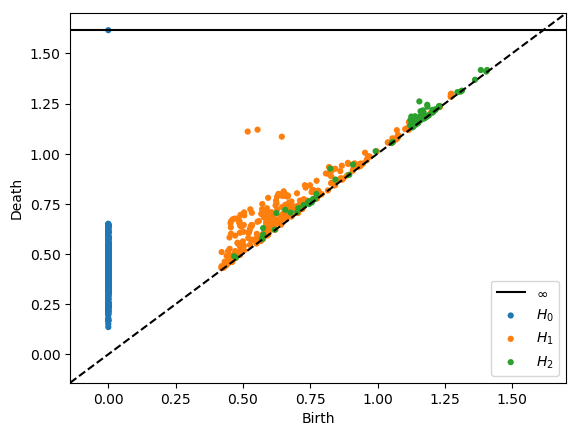

1
2
starting
['-0.39', '-0.467', '-0.539', '-0.609', '-0.674', '-0.698', '-0.682', '-0.671', '-0.666', '-0.662', '-0.659', '-0.656', '-0.653', '-0.65', '-0.647', '-0.644', '-0.641', '-0.637', '-0.633', '-0.628', '-0.619', '-0.602', '-0.59', '-0.573', '-0.548', '-0.52', '-0.49', '-0.457', '-0.424', '-0.392', '-0.362', '-0.334', '-0.306', '-0.278', '-0.247', '-0.219', '-0.199', '-0.185', '-0.173', '-0.159', '-0.141', '-0.125', '-0.112', '-0.1', '-0.09', '-0.082', '-0.075', '-0.069', '-0.063', '-0.057', '-0.053', '-0.051', '-0.049', '-0.047', '-0.045', '-0.043', '-0.041', '-0.039', '-0.037', '-0.036', '-0.036', '-0.037', '-0.038', '-0.04', '-0.041', '-0.043', '-0.044', '-0.045', '-0.047', '-0.05', '-0.052', '-0.054', '-0.058', '-0.066', '-0.047', '0.006', '0.099', '0.221', '0.368', '0.532', '0.696', '0.833', '0.915', '0.942', '0.926', '0.877', '0.766', '0.624', '0.467', '0.308', '0.161', '0.041', '-0.035', '-0.073', '-0.088', '-0.095', '-0.1', '-0.105', '-0.109', '-0.112', '-0.115', '-0.1

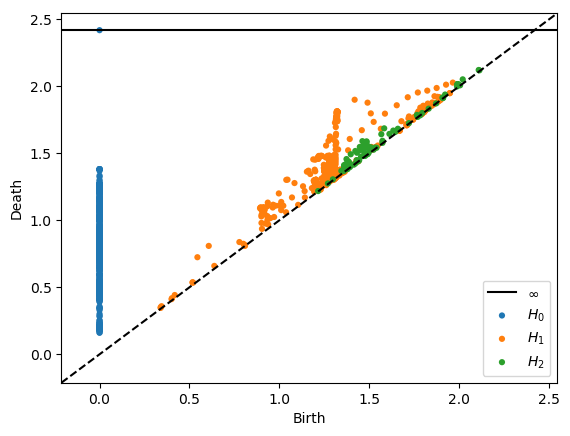

1
2
starting
['-0.037', '-0.038', '-0.04', '-0.041', '-0.043', '-0.044', '-0.045', '-0.046', '-0.047', '-0.049', '-0.052', '-0.054', '-0.055', '-0.054', '-0.052', '-0.049', '-0.047', '-0.045', '-0.043', '-0.041', '-0.039', '-0.036', '-0.034', '-0.032', '-0.029', '-0.027', '-0.024', '-0.02', '-0.016', '-0.01', '-0.005', '-0.001', '0.0', '0.003', '0.006', '0.008', '0.009', '0.009', '0.007', '0.004', '0.0', '-0.008', '-0.021', '-0.035', '-0.049', '-0.061', '-0.069', '-0.075', '-0.077', '-0.079', '-0.081', '-0.082', '-0.084', '-0.085', '-0.086', '-0.087', '-0.088', '-0.089', '-0.09', '-0.09', '-0.09', '-0.091', '-0.092', '-0.093', '-0.094', '-0.095', '-0.096', '-0.097', '-0.098', '-0.099', '-0.099', '-0.099', '-0.1', '-0.1', '-0.102', '-0.099', '-0.076', '-0.028', '0.044', '0.133', '0.218', '0.262', '0.255', '0.18', '0.012', '-0.195', '-0.382', '-0.484', '-0.493', '-0.44', '-0.332', '-0.235', '-0.166', '-0.128', '-0.103', '-0.086', '-0.074', '-0.069', '-0.065', '-0.061', '-0.057', '-0.054'

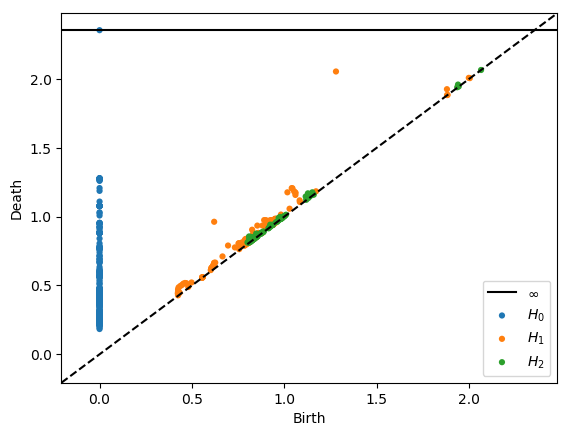

1
2
starting
['0.346', '0.353', '0.358', '0.362', '0.365', '0.367', '0.368', '0.369', '0.37', '0.37', '0.371', '0.373', '0.375', '0.377', '0.378', '0.375', '0.366', '0.354', '0.342', '0.327', '0.313', '0.301', '0.286', '0.269', '0.252', '0.236', '0.22', '0.203', '0.186', '0.168', '0.148', '0.127', '0.107', '0.09', '0.074', '0.057', '0.04', '0.025', '0.013', '0.001', '-0.011', '-0.024', '-0.037', '-0.05', '-0.063', '-0.075', '-0.088', '-0.102', '-0.115', '-0.127', '-0.139', '-0.147', '-0.152', '-0.159', '-0.17', '-0.184', '-0.2', '-0.223', '-0.254', '-0.288', '-0.319', '-0.347', '-0.372', '-0.396', '-0.423', '-0.438', '-0.445', '-0.448', '-0.447', '-0.446', '-0.444', '-0.442', '-0.442', '-0.444', '-0.445', '-0.443', '-0.441', '-0.44', '-0.439', '-0.437', '-0.434', '-0.432', '-0.43', '-0.427', '-0.424', '-0.423', '-0.42', '-0.414', '-0.41', '-0.413', '-0.423', '-0.437', '-0.449', '-0.462', '-0.473', '-0.481', '-0.49', '-0.502', '-0.512', '-0.509', '-0.483', '-0.424', '-0.359', '-0.292', 

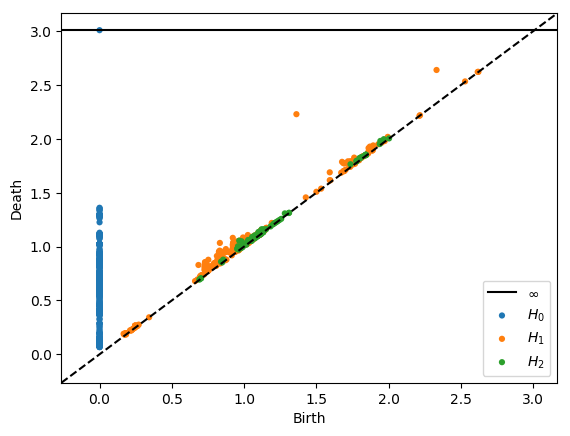

1
2
starting
['0.037', '0.053', '0.067', '0.085', '0.106', '0.125', '0.14', '0.153', '0.166', '0.178', '0.187', '0.196', '0.203', '0.21', '0.215', '0.221', '0.23', '0.244', '0.261', '0.276', '0.288', '0.3', '0.312', '0.323', '0.333', '0.343', '0.353', '0.362', '0.371', '0.381', '0.388', '0.39', '0.392', '0.392', '0.393', '0.393', '0.394', '0.395', '0.394', '0.39', '0.383', '0.375', '0.369', '0.364', '0.358', '0.352', '0.346', '0.342', '0.338', '0.334', '0.33', '0.327', '0.323', '0.32', '0.316', '0.313', '0.309', '0.304', '0.299', '0.292', '0.285', '0.274', '0.258', '0.246', '0.236', '0.232', '0.229', '0.226', '0.224', '0.222', '0.22', '0.218', '0.216', '0.213', '0.21', '0.207', '0.204', '0.201', '0.197', '0.192', '0.185', '0.173', '0.161', '0.151', '0.142', '0.134', '0.127', '0.12', '0.113', '0.108', '0.103', '0.098', '0.092', '0.084', '0.076', '0.067', '0.059', '0.052', '0.045', '0.038', '0.029', '0.02', '0.01', '-0.001', '-0.016', '-0.03', '-0.043', '-0.052', '-0.057', '-0.061', '-0.

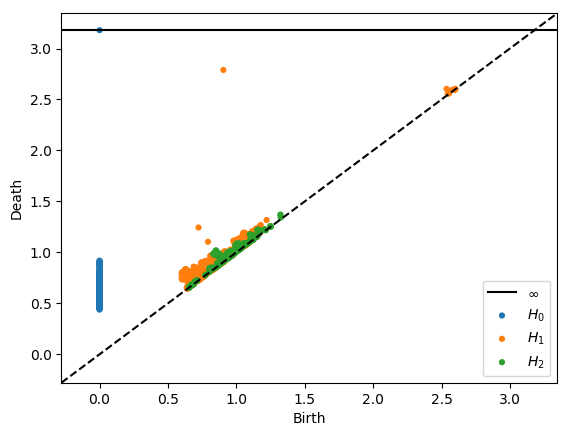

1
2
starting
['0.286', '0.277', '0.274', '0.271', '0.269', '0.267', '0.265', '0.262', '0.26', '0.257', '0.253', '0.245', '0.229', '0.203', '0.178', '0.153', '0.136', '0.118', '0.101', '0.087', '0.077', '0.068', '0.061', '0.055', '0.05', '0.045', '0.041', '0.038', '0.035', '0.032', '0.03', '0.03', '0.029', '0.029', '0.028', '0.026', '0.025', '0.025', '0.027', '0.029', '0.031', '0.033', '0.035', '0.038', '0.04', '0.04', '0.037', '0.035', '0.031', '0.019', '-0.027', '-0.11', '-0.223', '-0.34', '-0.428', '-0.452', '-0.397', '-0.276', '-0.125', '0.002', '0.054', '0.058', '0.035', '0.016', '0.011', '0.02', '0.028', '0.032', '0.035', '0.036', '0.038', '0.043', '0.047', '0.047', '0.04', '0.036', '0.034', '0.032', '0.03', '0.028', '0.025', '0.022', '0.02', '0.016', '0.011', '-0.006', '-0.035', '-0.064', '-0.081', '-0.098', '-0.112', '-0.133', '-0.158', '-0.167', '-0.174', '-0.172', '-0.149', '-0.123', '-0.11', '-0.1', '-0.087', '-0.064', '-0.03', '0.0', '0.006', '0.007', '0.009', '0.01', '0.011

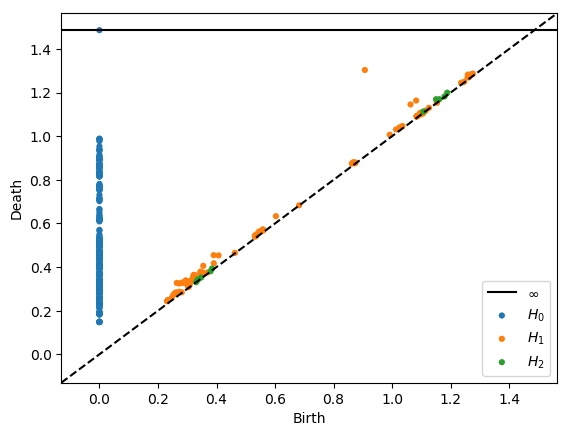

1
2
starting
['0.27', '0.322', '0.378', '0.44', '0.498', '0.518', '0.508', '0.489', '0.464', '0.418', '0.365', '0.317', '0.267', '0.196', '0.115', '0.045', '0.0', '-0.015', '-0.016', '-0.002', '0.034', '0.088', '0.108', '0.109', '0.1', '0.075', '-0.001', '-0.104', '-0.215', '-0.332', '-0.456', '-0.579', '-0.681', '-0.751', '-0.785', '-0.804', '-0.815', '-0.826', '-0.837', '-0.857', '-0.886', '-0.901', '-0.908', '-0.913', '-0.917', '-0.922', '-0.927', '-0.932', '-0.94', '-0.95', '-0.97', '-1.0', '-1.024', '-1.051', '-1.106', '-1.17', '-1.235', '-1.258', '-1.265', '-1.27', '-1.272', '-1.273', '-1.271', '-1.265', '-1.254', '-1.218', '-1.168', '-1.137', '-1.111', '-1.091', '-1.073', '-1.051', '-1.02', '-0.99', '-0.955', '-0.912', '-0.892', '-0.886', '-0.882', '-0.884', '-0.902', '-0.921', '-0.942', '-0.955', '-0.966', '-0.976', '-0.981', '-0.975', '-0.96', '-0.937', '-0.906', '-0.884', '-0.867', '-0.851', '-0.832', '-0.805', '-0.776', '-0.746', '-0.715', '-0.688', '-0.664', '-0.637', '-0.6

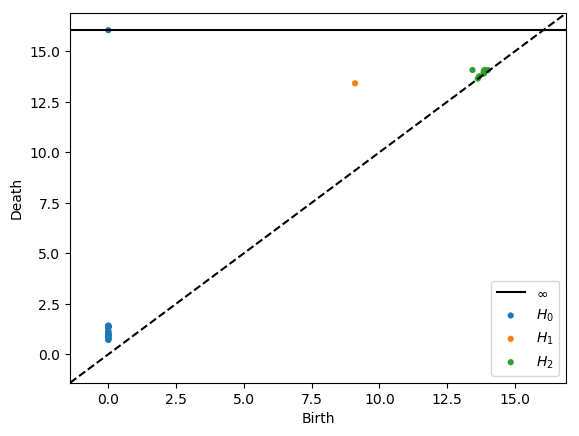

1
2
starting
['0.323', '0.315', '0.306', '0.297', '0.286', '0.273', '0.261', '0.252', '0.246', '0.241', '0.234', '0.228', '0.222', '0.217', '0.213', '0.214', '0.219', '0.223', '0.226', '0.229', '0.233', '0.243', '0.266', '0.324', '0.399', '0.521', '0.676', '0.878', '1.125', '1.412', '1.728', '2.029', '2.313', '2.53', '2.673', '2.756', '2.765', '2.732', '2.646', '2.53', '2.444', '2.347', '2.269', '2.198', '2.115', '2.036', '1.927', '1.861', '1.747', '1.673', '1.569', '1.442', '1.34', '1.196', '1.092', '0.96', '0.848', '0.742', '0.639', '0.54', '0.428', '0.323', '0.211', '0.108', '0.027', '-0.059', '-0.135', '-0.198', '-0.256', '-0.311', '-0.346', '-0.381', '-0.421', '-0.448', '-0.495', '-0.551', '-0.597', '-0.623', '-0.647', '-0.666', '-0.683', '-0.695', '-0.706', '-0.715', '-0.723', '-0.73', '-0.734', '-0.738', '-0.741', '-0.746', '-0.757', '-0.763', '-0.76', '-0.751', '-0.736', '-0.714', '-0.69', '-0.663', '-0.611', '-0.56', '-0.512', '-0.47', '-0.428', '-0.384', '-0.339', '-0.287', '

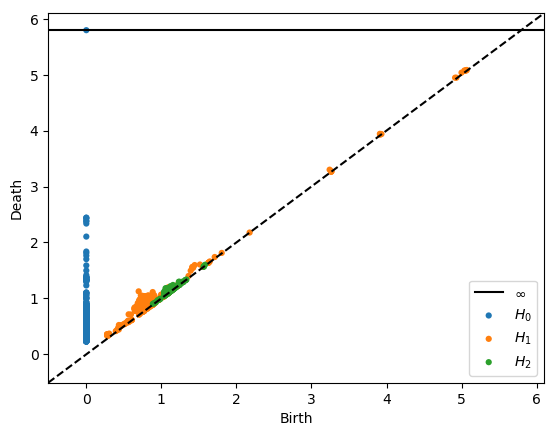

1
2
starting
['0.36', '0.37', '0.376', '0.382', '0.386', '0.389', '0.392', '0.394', '0.395', '0.396', '0.395', '0.393', '0.39', '0.387', '0.383', '0.379', '0.375', '0.37', '0.36', '0.348', '0.337', '0.324', '0.301', '0.263', '0.234', '0.215', '0.196', '0.178', '0.163', '0.151', '0.14', '0.13', '0.121', '0.113', '0.105', '0.099', '0.093', '0.089', '0.084', '0.079', '0.074', '0.069', '0.065', '0.061', '0.058', '0.055', '0.05', '0.045', '0.04', '0.036', '0.033', '0.029', '0.024', '0.016', '0.005', '-0.014', '-0.037', '-0.046', '-0.049', '-0.053', '-0.058', '-0.062', '-0.064', '-0.066', '-0.067', '-0.067', '-0.068', '-0.068', '-0.069', '-0.07', '-0.07', '-0.069', '-0.068', '-0.069', '-0.069', '-0.07', '-0.071', '-0.072', '-0.072', '-0.074', '-0.075', '-0.077', '-0.078', '-0.079', '-0.08', '-0.081', '-0.082', '-0.085', '-0.088', '-0.091', '-0.093', '-0.095', '-0.096', '-0.097', '-0.097', '-0.097', '-0.095', '-0.091', '-0.085', '-0.08', '-0.075', '-0.072', '-0.07', '-0.067', '-0.064', '-0.06

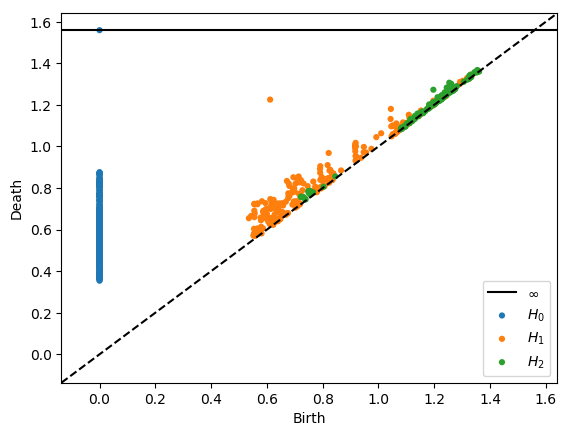

1
2
starting
['-0.425', '-0.509', '-0.597', '-0.689', '-0.769', '-0.798', '-0.807', '-0.811', '-0.811', '-0.803', '-0.79', '-0.77', '-0.737', '-0.679', '-0.593', '-0.494', '-0.394', '-0.299', '-0.207', '-0.131', '-0.106', '-0.121', '-0.163', '-0.248', '-0.34', '-0.436', '-0.532', '-0.623', '-0.696', '-0.737', '-0.752', '-0.758', '-0.753', '-0.74', '-0.732', '-0.727', '-0.723', '-0.719', '-0.714', '-0.709', '-0.704', '-0.698', '-0.691', '-0.685', '-0.677', '-0.668', '-0.659', '-0.65', '-0.642', '-0.634', '-0.627', '-0.622', '-0.617', '-0.613', '-0.609', '-0.604', '-0.6', '-0.595', '-0.591', '-0.586', '-0.582', '-0.579', '-0.577', '-0.574', '-0.572', '-0.57', '-0.567', '-0.565', '-0.562', '-0.56', '-0.558', '-0.556', '-0.554', '-0.552', '-0.551', '-0.549', '-0.546', '-0.544', '-0.539', '-0.532', '-0.524', '-0.515', '-0.506', '-0.496', '-0.487', '-0.477', '-0.467', '-0.457', '-0.448', '-0.438', '-0.429', '-0.419', '-0.41', '-0.396', '-0.378', '-0.36', '-0.342', '-0.324', '-0.305', '-0.289

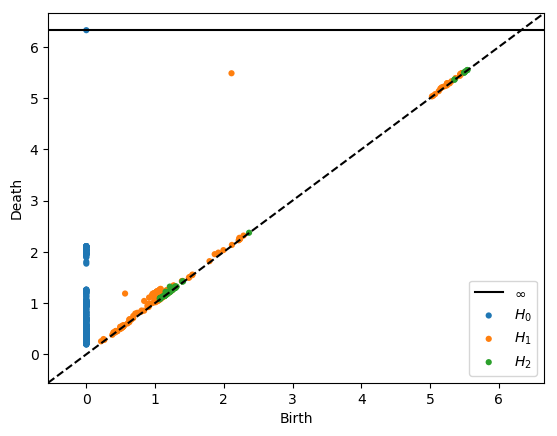

1
2
starting
['-0.037', '-0.03', '-0.02', '-0.002', '0.012', '0.021', '0.029', '0.034', '0.037', '0.038', '0.037', '0.035', '0.033', '0.032', '0.03', '0.029', '0.028', '0.027', '0.026', '0.024', '0.021', '0.019', '0.017', '0.015', '0.014', '0.013', '0.012', '0.009', '0.007', '0.003', '-0.005', '-0.011', '-0.008', '0.0', '0.004', '0.007', '0.01', '0.013', '0.017', '0.021', '0.024', '0.027', '0.033', '0.041', '0.073', '0.137', '0.22', '0.309', '0.388', '0.426', '0.424', '0.375', '0.265', '0.124', '0.006', '-0.053', '-0.073', '-0.052', '-0.017', '0.007', '0.015', '0.019', '0.021', '0.024', '0.027', '0.03', '0.034', '0.041', '0.05', '0.039', '0.019', '0.001', '-0.008', '-0.016', '-0.014', '0.0', '0.01', '0.019', '0.026', '0.029', '0.03', '0.027', '0.022', '0.016', '0.01', '0.001', '0.004', '0.027', '0.044', '0.058', '0.068', '0.075', '0.079', '0.083', '0.088', '0.095', '0.098', '0.093', '0.084', '0.078', '0.074', '0.07', '0.067', '0.064', '0.063', '0.062', '0.063', '0.065', '0.068', '0.072

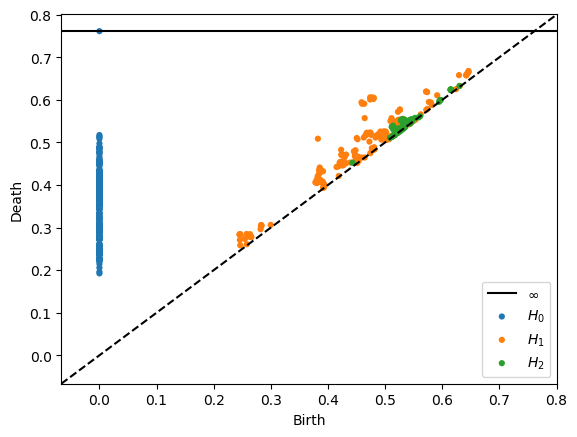

1
2
starting
['-0.028', '-0.025', '-0.022', '-0.019', '-0.017', '-0.014', '-0.011', '-0.007', '-0.003', '0.0', '0.003', '0.006', '0.009', '0.012', '0.014', '0.015', '0.015', '0.014', '0.013', '0.011', '0.009', '0.008', '0.006', '0.004', '0.002', '0.0', '-0.001', '-0.004', '-0.01', '-0.016', '-0.023', '-0.027', '-0.027', '-0.025', '-0.022', '-0.018', '-0.013', '-0.007', '-0.002', '0.0', '-0.003', '-0.007', '-0.009', '-0.012', '-0.016', '-0.02', '-0.023', '-0.023', '-0.019', '-0.012', '-0.005', '0.001', '0.006', '0.012', '0.019', '0.025', '0.031', '0.035', '0.037', '0.038', '0.037', '0.035', '0.032', '0.026', '0.019', '0.012', '0.005', '0.0', '-0.004', '-0.008', '-0.012', '-0.017', '-0.021', '-0.025', '-0.029', '-0.033', '-0.036', '-0.04', '-0.044', '-0.047', '-0.05', '-0.052', '-0.053', '-0.053', '-0.052', '-0.051', '-0.049', '-0.048', '-0.046', '-0.043', '-0.04', '-0.038', '-0.036', '-0.035', '-0.034', '-0.034', '-0.033', '-0.032', '-0.03', '-0.028', '-0.026', '-0.023', '-0.02', '-0.01

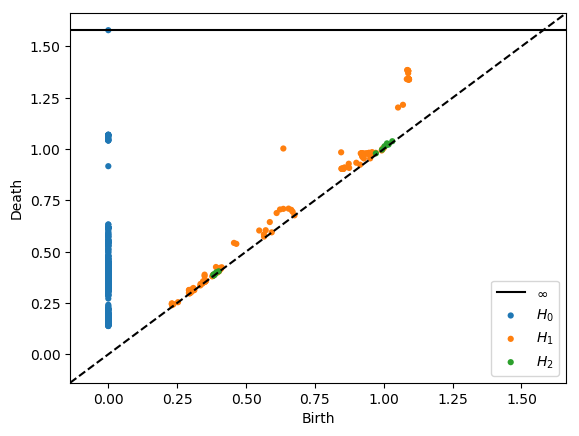

1
2
starting
['0.387', '0.461', '0.538', '0.619', '0.696', '0.748', '0.763', '0.778', '0.793', '0.819', '0.85', '0.895', '0.951', '1.008', '1.058', '1.102', '1.146', '1.193', '1.239', '1.262', '1.274', '1.281', '1.285', '1.289', '1.29', '1.288', '1.284', '1.278', '1.271', '1.264', '1.255', '1.246', '1.236', '1.225', '1.213', '1.2', '1.187', '1.175', '1.163', '1.153', '1.143', '1.135', '1.128', '1.121', '1.116', '1.11', '1.103', '1.096', '1.087', '1.075', '1.058', '1.043', '1.028', '1.012', '0.996', '0.979', '0.963', '0.945', '0.929', '0.915', '0.901', '0.886', '0.871', '0.856', '0.844', '0.833', '0.822', '0.811', '0.8', '0.788', '0.776', '0.763', '0.75', '0.737', '0.72', '0.702', '0.687', '0.679', '0.675', '0.671', '0.668', '0.666', '0.663', '0.659', '0.655', '0.65', '0.646', '0.642', '0.638', '0.635', '0.633', '0.63', '0.629', '0.627', '0.626', '0.625', '0.623', '0.62', '0.617', '0.614', '0.613', '0.611', '0.609', '0.607', '0.604', '0.601', '0.599', '0.596', '0.591', '0.582', '0.57', 

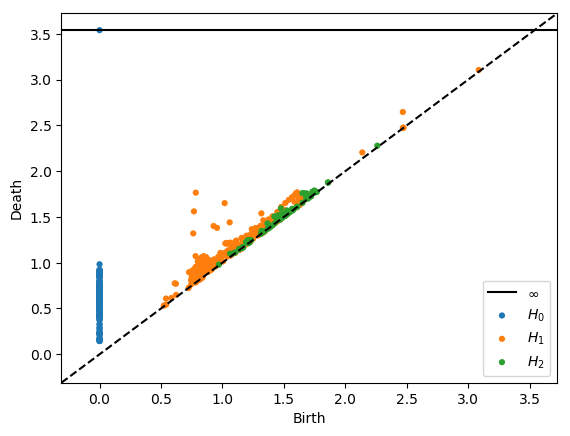

1
2
starting
['0.326', '0.401', '0.479', '0.552', '0.602', '0.617', '0.626', '0.631', '0.635', '0.637', '0.639', '0.641', '0.643', '0.645', '0.649', '0.652', '0.65', '0.64', '0.624', '0.598', '0.566', '0.546', '0.53', '0.509', '0.493', '0.48', '0.469', '0.458', '0.448', '0.436', '0.423', '0.409', '0.396', '0.386', '0.377', '0.369', '0.363', '0.357', '0.351', '0.343', '0.332', '0.314', '0.298', '0.284', '0.274', '0.267', '0.262', '0.259', '0.257', '0.254', '0.25', '0.246', '0.24', '0.234', '0.226', '0.214', '0.193', '0.173', '0.158', '0.147', '0.139', '0.135', '0.132', '0.131', '0.13', '0.13', '0.13', '0.129', '0.127', '0.126', '0.126', '0.125', '0.124', '0.124', '0.124', '0.124', '0.123', '0.124', '0.122', '0.119', '0.131', '0.167', '0.213', '0.271', '0.339', '0.411', '0.47', '0.491', '0.491', '0.475', '0.43', '0.362', '0.286', '0.207', '0.13', '0.061', '0.036', '0.029', '0.024', '0.02', '0.017', '0.015', '0.012', '0.009', '0.006', '0.003', '0.0', '-0.003', '-0.006', '-0.009', '-0.01',

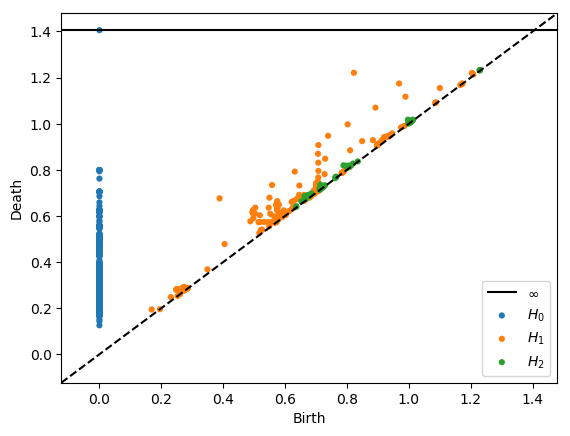

1
2
starting
['-0.286', '-0.285', '-0.285', '-0.284', '-0.284', '-0.284', '-0.285', '-0.29', '-0.294', '-0.298', '-0.301', '-0.304', '-0.307', '-0.309', '-0.309', '-0.305', '-0.298', '-0.289', '-0.279', '-0.267', '-0.248', '-0.236', '-0.233', '-0.231', '-0.23', '-0.229', '-0.228', '-0.227', '-0.226', '-0.224', '-0.223', '-0.22', '-0.217', '-0.212', '-0.206', '-0.197', '-0.179', '-0.143', '-0.12', '-0.106', '-0.092', '-0.076', '-0.06', '-0.044', '-0.028', '-0.014', '-0.002', '0.006', '0.014', '0.025', '0.037', '0.048', '0.055', '0.062', '0.067', '0.072', '0.076', '0.079', '0.081', '0.081', '0.079', '0.077', '0.074', '0.071', '0.067', '0.063', '0.059', '0.052', '0.045', '0.037', '0.031', '0.023', '0.015', '0.006', '-0.002', '-0.011', '-0.021', '-0.031', '-0.04', '-0.052', '-0.062', '-0.067', '-0.07', '-0.072', '-0.075', '-0.08', '-0.079', '-0.068', '-0.061', '-0.056', '-0.05', '-0.046', '-0.045', '-0.045', '-0.047', '-0.049', '-0.051', '-0.055', '-0.063', '-0.046', '-0.037', '-0.034', '-

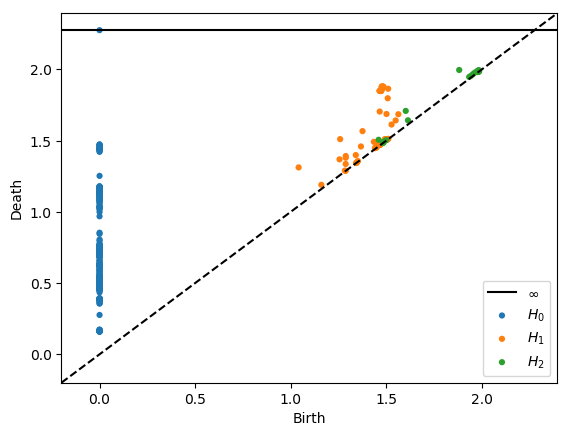

1
2
starting
['-0.063', '-0.085', '-0.102', '-0.123', '-0.141', '-0.158', '-0.167', '-0.172', '-0.175', '-0.177', '-0.179', '-0.182', '-0.184', '-0.186', '-0.186', '-0.187', '-0.187', '-0.187', '-0.187', '-0.186', '-0.186', '-0.186', '-0.187', '-0.187', '-0.187', '-0.187', '-0.187', '-0.187', '-0.186', '-0.186', '-0.186', '-0.184', '-0.182', '-0.178', '-0.175', '-0.173', '-0.17', '-0.167', '-0.164', '-0.16', '-0.156', '-0.151', '-0.147', '-0.143', '-0.137', '-0.131', '-0.126', '-0.122', '-0.119', '-0.117', '-0.114', '-0.112', '-0.108', '-0.105', '-0.103', '-0.101', '-0.1', '-0.098', '-0.098', '-0.097', '-0.098', '-0.098', '-0.099', '-0.101', '-0.103', '-0.105', '-0.108', '-0.11', '-0.112', '-0.114', '-0.116', '-0.119', '-0.123', '-0.127', '-0.133', '-0.139', '-0.145', '-0.15', '-0.156', '-0.161', '-0.166', '-0.171', '-0.176', '-0.182', '-0.188', '-0.192', '-0.194', '-0.192', '-0.187', '-0.179', '-0.169', '-0.158', '-0.141', '-0.126', '-0.112', '-0.102', '-0.093', '-0.086', '-0.08', '-0

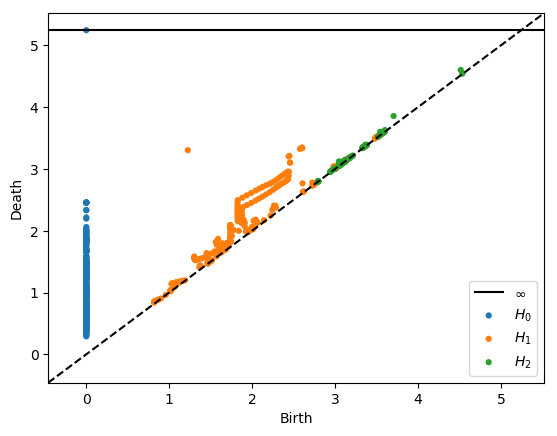

1
2
starting
['0.657', '0.79', '0.931', '1.072', '1.191', '1.232', '1.247', '1.246', '1.233', '1.222', '1.214', '1.205', '1.196', '1.188', '1.182', '1.177', '1.171', '1.166', '1.162', '1.157', '1.15', '1.143', '1.137', '1.13', '1.123', '1.117', '1.112', '1.107', '1.101', '1.095', '1.09', '1.085', '1.081', '1.078', '1.074', '1.071', '1.068', '1.066', '1.061', '1.054', '1.045', '1.037', '1.027', '1.018', '1.008', '0.998', '0.988', '0.977', '0.965', '0.951', '0.939', '0.929', '0.921', '0.914', '0.907', '0.9', '0.893', '0.884', '0.874', '0.862', '0.85', '0.84', '0.83', '0.819', '0.814', '0.818', '0.829', '0.858', '0.907', '0.969', '1.048', '1.143', '1.245', '1.345', '1.434', '1.493', '1.514', '1.515', '1.499', '1.454', '1.386', '1.3', '1.199', '1.091', '0.985', '0.889', '0.81', '0.749', '0.713', '0.678', '0.642', '0.62', '0.608', '0.599', '0.591', '0.585', '0.579', '0.569', '0.554', '0.534', '0.521', '0.513', '0.506', '0.499', '0.493', '0.488', '0.483', '0.477', '0.472', '0.466', '0.459', 

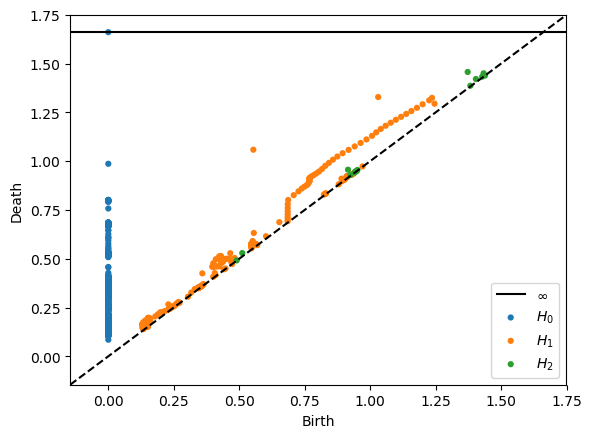

1
2
starting
['0.703', '0.721', '0.738', '0.763', '0.793', '0.819', '0.848', '0.876', '0.902', '0.928', '0.958', '0.984', '1.005', '1.029', '1.053', '1.074', '1.089', '1.101', '1.11', '1.117', '1.12', '1.117', '1.107', '1.094', '1.074', '1.042', '0.992', '0.933', '0.861', '0.775', '0.679', '0.578', '0.477', '0.373', '0.277', '0.185', '0.1', '0.02', '-0.05', '-0.113', '-0.172', '-0.229', '-0.262', '-0.298', '-0.333', '-0.354', '-0.371', '-0.392', '-0.402', '-0.409', '-0.417', '-0.422', '-0.427', '-0.429', '-0.43', '-0.431', '-0.43', '-0.427', '-0.424', '-0.421', '-0.417', '-0.414', '-0.41', '-0.406', '-0.401', '-0.398', '-0.394', '-0.391', '-0.389', '-0.387', '-0.384', '-0.38', '-0.376', '-0.372', '-0.369', '-0.366', '-0.363', '-0.362', '-0.363', '-0.364', '-0.364', '-0.366', '-0.367', '-0.367', '-0.367', '-0.368', '-0.369', '-0.369', '-0.37', '-0.37', '-0.371', '-0.372', '-0.374', '-0.375', '-0.376', '-0.377', '-0.378', '-0.379', '-0.379', '-0.379', '-0.377', '-0.376', '-0.373', '-0.36

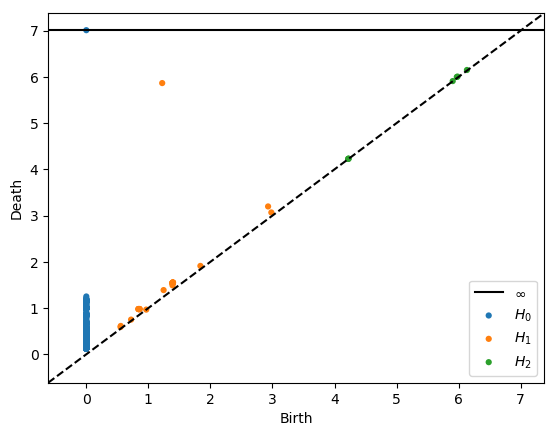

1
2
starting
['-0.031', '-0.035', '-0.043', '-0.052', '-0.058', '-0.062', '-0.064', '-0.066', '-0.068', '-0.072', '-0.075', '-0.071', '-0.063', '-0.056', '-0.049', '-0.042', '-0.033', '-0.026', '-0.02', '-0.016', '-0.012', '-0.01', '-0.007', '-0.005', '-0.002', '0.0', '0.004', '0.007', '0.01', '0.014', '0.019', '0.028', '0.038', '0.047', '0.054', '0.06', '0.065', '0.07', '0.076', '0.082', '0.088', '0.095', '0.101', '0.109', '0.115', '0.12', '0.123', '0.126', '0.131', '0.137', '0.135', '0.118', '0.101', '0.086', '0.074', '0.065', '0.06', '0.056', '0.051', '0.048', '0.045', '0.044', '0.044', '0.046', '0.048', '0.053', '0.059', '0.067', '0.083', '0.115', '0.171', '0.247', '0.347', '0.464', '0.592', '0.716', '0.817', '0.866', '0.863', '0.795', '0.638', '0.432', '0.215', '0.026', '-0.108', '-0.174', '-0.198', '-0.2', '-0.186', '-0.146', '-0.093', '-0.031', '0.023', '0.046', '0.054', '0.059', '0.062', '0.069', '0.079', '0.088', '0.094', '0.099', '0.103', '0.108', '0.111', '0.115', '0.118', '

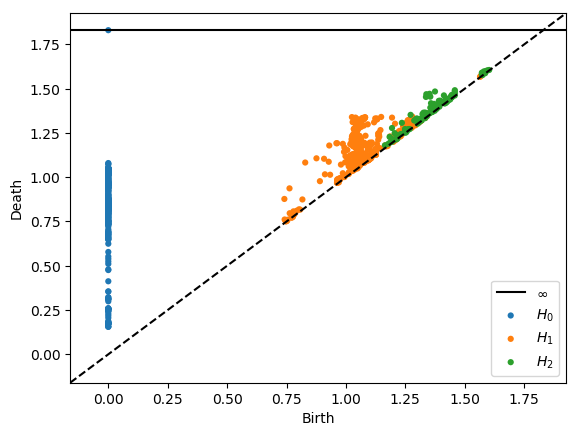

1
2
starting
['0.044', '0.019', '-0.002', '-0.017', '-0.033', '-0.046', '-0.057', '-0.068', '-0.077', '-0.082', '-0.085', '-0.089', '-0.092', '-0.095', '-0.097', '-0.099', '-0.101', '-0.101', '-0.1', '-0.098', '-0.094', '-0.089', '-0.084', '-0.079', '-0.074', '-0.07', '-0.065', '-0.06', '-0.054', '-0.048', '-0.043', '-0.038', '-0.033', '-0.03', '-0.027', '-0.025', '-0.024', '-0.022', '-0.022', '-0.021', '-0.019', '-0.017', '-0.015', '-0.012', '-0.009', '-0.006', '-0.003', '0.0', '0.003', '0.008', '0.015', '0.023', '0.029', '0.035', '0.041', '0.047', '0.053', '0.06', '0.067', '0.075', '0.083', '0.093', '0.105', '0.115', '0.124', '0.129', '0.133', '0.136', '0.139', '0.141', '0.143', '0.144', '0.143', '0.141', '0.138', '0.133', '0.127', '0.12', '0.105', '0.077', '0.059', '0.048', '0.036', '0.024', '0.011', '-0.001', '-0.007', '-0.009', '-0.011', '-0.012', '-0.014', '-0.015', '-0.016', '-0.017', '-0.017', '-0.017', '-0.017', '-0.016', '-0.014', '-0.01', '-0.005', '0.002', '0.025', '0.067',

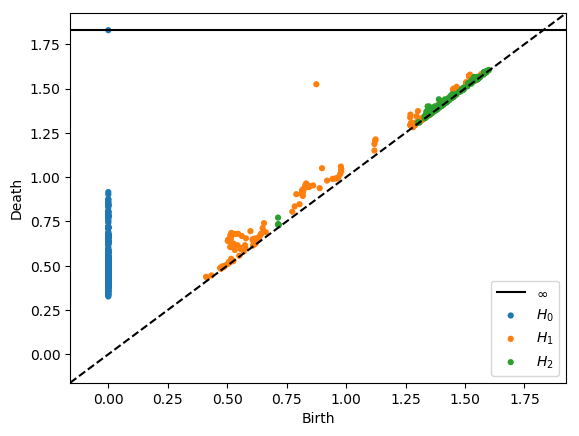

1
2
starting
['-0.041', '-0.038', '-0.036', '-0.033', '-0.031', '-0.029', '-0.029', '-0.032', '-0.036', '-0.04', '-0.044', '-0.048', '-0.051', '-0.053', '-0.052', '-0.049', '-0.045', '-0.041', '-0.037', '-0.033', '-0.029', '-0.025', '-0.022', '-0.018', '-0.014', '-0.01', '-0.005', '-0.001', '0.003', '0.009', '0.018', '0.024', '0.029', '0.031', '0.033', '0.034', '0.034', '0.031', '0.025', '0.018', '0.006', '-0.011', '-0.027', '-0.04', '-0.046', '-0.049', '-0.051', '-0.052', '-0.054', '-0.055', '-0.057', '-0.059', '-0.06', '-0.062', '-0.063', '-0.065', '-0.066', '-0.068', '-0.071', '-0.072', '-0.072', '-0.071', '-0.068', '-0.065', '-0.052', '-0.029', '0.001', '0.038', '0.084', '0.145', '0.221', '0.306', '0.388', '0.451', '0.473', '0.441', '0.345', '0.194', '0.01', '-0.17', '-0.305', '-0.362', '-0.366', '-0.328', '-0.268', '-0.213', '-0.161', '-0.107', '-0.062', '-0.039', '-0.036', '-0.033', '-0.031', '-0.029', '-0.028', '-0.028', '-0.027', '-0.026', '-0.025', '-0.024', '-0.023', '-0.023'

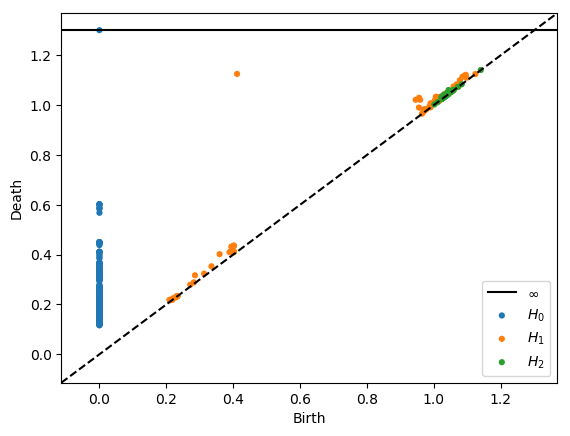

1
2
starting
['0.19', '0.223', '0.252', '0.275', '0.289', '0.3', '0.285', '0.265', '0.248', '0.23', '0.213', '0.196', '0.179', '0.155', '0.122', '0.086', '0.048', '0.009', '-0.027', '-0.064', '-0.101', '-0.136', '-0.174', '-0.215', '-0.251', '-0.284', '-0.318', '-0.353', '-0.388', '-0.426', '-0.459', '-0.488', '-0.514', '-0.536', '-0.56', '-0.584', '-0.609', '-0.629', '-0.64', '-0.652', '-0.666', '-0.688', '-0.715', '-0.739', '-0.763', '-0.788', '-0.812', '-0.834', '-0.863', '-0.88', '-0.888', '-0.894', '-0.899', '-0.902', '-0.904', '-0.904', '-0.902', '-0.899', '-0.894', '-0.889', '-0.882', '-0.871', '-0.851', '-0.833', '-0.818', '-0.805', '-0.792', '-0.78', '-0.766', '-0.749', '-0.733', '-0.721', '-0.711', '-0.704', '-0.697', '-0.691', '-0.686', '-0.683', '-0.681', '-0.679', '-0.676', '-0.673', '-0.669', '-0.665', '-0.66', '-0.653', '-0.644', '-0.624', '-0.588', '-0.555', '-0.525', '-0.497', '-0.469', '-0.441', '-0.412', '-0.382', '-0.354', '-0.334', '-0.317', '-0.297', '-0.269', '-0

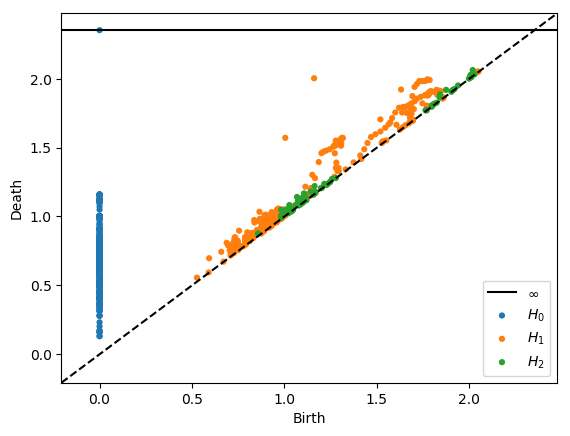

1
2
starting
['-0.367', '-0.44', '-0.516', '-0.59', '-0.638', '-0.657', '-0.663', '-0.656', '-0.641', '-0.628', '-0.615', '-0.604', '-0.592', '-0.582', '-0.574', '-0.566', '-0.558', '-0.552', '-0.548', '-0.543', '-0.538', '-0.535', '-0.531', '-0.528', '-0.524', '-0.521', '-0.519', '-0.517', '-0.515', '-0.514', '-0.513', '-0.514', '-0.516', '-0.518', '-0.521', '-0.524', '-0.528', '-0.531', '-0.535', '-0.539', '-0.543', '-0.547', '-0.552', '-0.556', '-0.56', '-0.563', '-0.565', '-0.564', '-0.56', '-0.556', '-0.55', '-0.545', '-0.54', '-0.536', '-0.532', '-0.529', '-0.526', '-0.523', '-0.521', '-0.518', '-0.515', '-0.512', '-0.51', '-0.507', '-0.505', '-0.503', '-0.501', '-0.498', '-0.496', '-0.493', '-0.491', '-0.488', '-0.483', '-0.478', '-0.473', '-0.468', '-0.464', '-0.46', '-0.457', '-0.453', '-0.45', '-0.447', '-0.445', '-0.443', '-0.44', '-0.437', '-0.435', '-0.433', '-0.431', '-0.428', '-0.425', '-0.423', '-0.42', '-0.417', '-0.413', '-0.409', '-0.402', '-0.394', '-0.386', '-0.378

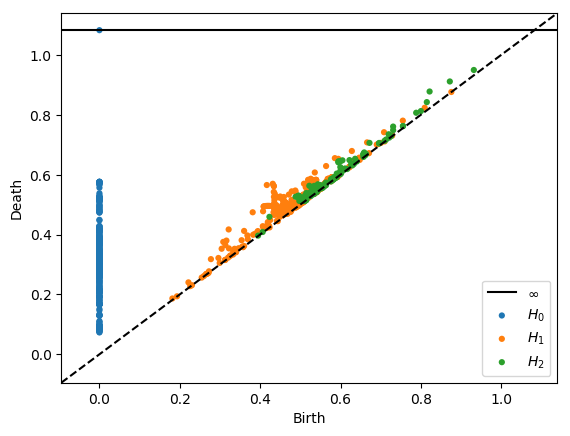

1
2
starting
['0.05', '0.044', '0.039', '0.035', '0.035', '0.037', '0.041', '0.046', '0.05', '0.054', '0.058', '0.063', '0.068', '0.071', '0.071', '0.069', '0.065', '0.058', '0.048', '0.011', '-0.048', '-0.122', '-0.209', '-0.297', '-0.36', '-0.368', '-0.341', '-0.205', '0.048', '0.418', '0.868', '1.337', '1.76', '2.073', '2.192', '2.187', '2.04', '1.762', '1.419', '1.084', '0.811', '0.599', '0.432', '0.306', '0.214', '0.144', '0.081', '0.024', '-0.034', '-0.091', '-0.141', '-0.189', '-0.217', '-0.228', '-0.234', '-0.238', '-0.241', '-0.244', '-0.246', '-0.248', '-0.248', '-0.248', '-0.247', '-0.246', '-0.244', '-0.241', '-0.237', '-0.233', '-0.229', '-0.225', '-0.219', '-0.206', '-0.203', '-0.203', '-0.202', '-0.201', '-0.2', '-0.201', '-0.202', '-0.203', '-0.204', '-0.205', '-0.205', '-0.205', '-0.206', '-0.206', '-0.208', '-0.209', '-0.21', '-0.211', '-0.21', '-0.209', '-0.209', '-0.207', '-0.206', '-0.204', '-0.202', '-0.199', '-0.198', '-0.197', '-0.197', '-0.197', '-0.197', '-0.1

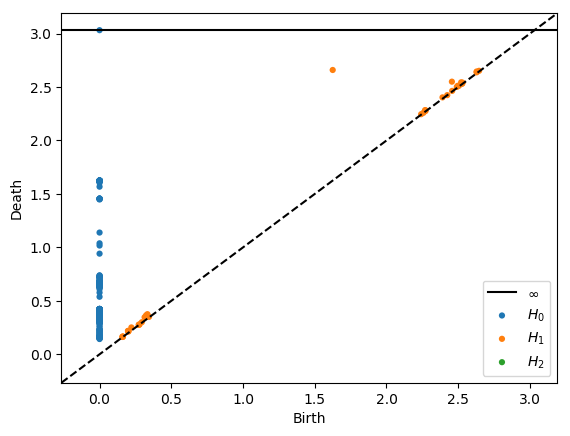

1
2
starting
['-0.09', '-0.09', '-0.09', '-0.089', '-0.088', '-0.088', '-0.089', '-0.09', '-0.091', '-0.092', '-0.094', '-0.095', '-0.095', '-0.096', '-0.097', '-0.096', '-0.095', '-0.094', '-0.092', '-0.091', '-0.089', '-0.088', '-0.087', '-0.085', '-0.085', '-0.085', '-0.085', '-0.086', '-0.087', '-0.088', '-0.09', '-0.091', '-0.091', '-0.091', '-0.09', '-0.088', '-0.086', '-0.084', '-0.083', '-0.082', '-0.08', '-0.076', '-0.073', '-0.069', '-0.066', '-0.063', '-0.06', '-0.057', '-0.053', '-0.047', '-0.042', '-0.036', '-0.031', '-0.026', '-0.021', '-0.017', '-0.013', '-0.009', '-0.005', '-0.001', '0.002', '0.005', '0.009', '0.013', '0.017', '0.019', '0.019', '0.016', '0.01', '0.003', '-0.004', '-0.012', '-0.018', '-0.023', '-0.027', '-0.031', '-0.035', '-0.039', '-0.042', '-0.046', '-0.051', '-0.057', '-0.061', '-0.063', '-0.063', '-0.062', '-0.061', '-0.059', '-0.056', '-0.053', '-0.049', '-0.043', '-0.037', '-0.032', '-0.026', '0.005', '0.096', '0.237', '0.434', '0.673', '0.912', '

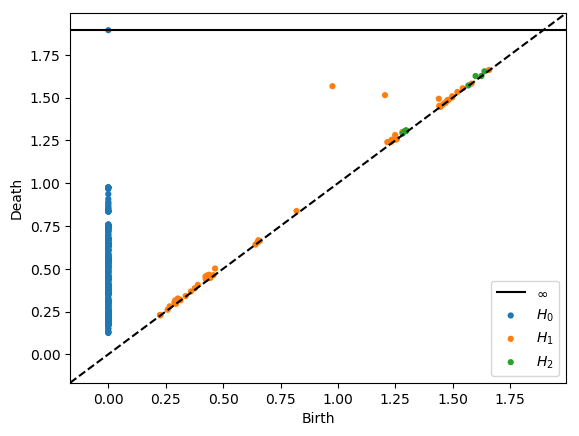

1
2
starting
['-0.131', '-0.148', '-0.163', '-0.172', '-0.18', '-0.185', '-0.183', '-0.176', '-0.165', '-0.15', '-0.132', '-0.124', '-0.12', '-0.118', '-0.117', '-0.117', '-0.117', '-0.117', '-0.117', '-0.118', '-0.118', '-0.118', '-0.117', '-0.117', '-0.116', '-0.115', '-0.114', '-0.112', '-0.11', '-0.107', '-0.103', '-0.099', '-0.089', '-0.066', '-0.053', '-0.045', '-0.039', '-0.039', '-0.047', '-0.058', '-0.064', '-0.069', '-0.073', '-0.077', '-0.081', '-0.083', '-0.085', '-0.086', '-0.087', '-0.086', '-0.084', '-0.082', '-0.079', '-0.076', '-0.072', '-0.069', '-0.066', '-0.06', '-0.054', '-0.05', '-0.05', '-0.055', '-0.062', '-0.071', '-0.081', '-0.094', '-0.101', '-0.097', '-0.088', '-0.074', '-0.056', '-0.048', '-0.043', '-0.04', '-0.039', '-0.04', '-0.045', '-0.053', '-0.06', '-0.065', '-0.07', '-0.074', '-0.078', '-0.082', '-0.084', '-0.085', '-0.085', '-0.084', '-0.081', '-0.078', '-0.073', '-0.068', '-0.064', '-0.059', '-0.054', '-0.048', '-0.043', '-0.037', '-0.032', '-0.027

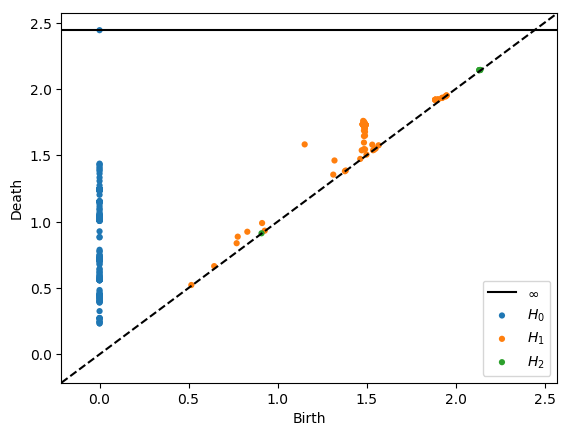

1
2
starting
['-0.42', '-0.456', '-0.493', '-0.515', '-0.53', '-0.525', '-0.467', '-0.4', '-0.367', '-0.343', '-0.328', '-0.354', '-0.398', '-0.438', '-0.468', '-0.501', '-0.538', '-0.573', '-0.598', '-0.614', '-0.626', '-0.634', '-0.641', '-0.647', '-0.65', '-0.651', '-0.647', '-0.638', '-0.628', '-0.618', '-0.607', '-0.598', '-0.592', '-0.587', '-0.585', '-0.583', '-0.581', '-0.58', '-0.58', '-0.58', '-0.579', '-0.579', '-0.578', '-0.577', '-0.576', '-0.575', '-0.574', '-0.574', '-0.574', '-0.572', '-0.57', '-0.566', '-0.562', '-0.557', '-0.552', '-0.543', '-0.532', '-0.523', '-0.512', '-0.491', '-0.476', '-0.473', '-0.472', '-0.471', '-0.469', '-0.468', '-0.467', '-0.467', '-0.467', '-0.467', '-0.467', '-0.47', '-0.474', '-0.478', '-0.483', '-0.488', '-0.493', '-0.5', '-0.512', '-0.534', '-0.542', '-0.546', '-0.549', '-0.551', '-0.553', '-0.553', '-0.546', '-0.536', '-0.526', '-0.518', '-0.511', '-0.503', '-0.497', '-0.49', '-0.485', '-0.48', '-0.477', '-0.473', '-0.469', '-0.464', 

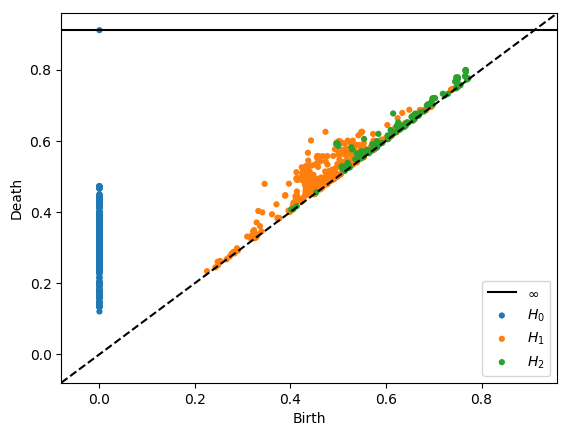

1
2
starting
['-0.068', '-0.068', '-0.059', '-0.014', '0.056', '0.155', '0.291', '0.468', '0.666', '0.822', '0.88', '0.817', '0.651', '0.418', '0.173', '-0.016', '-0.08', '-0.095', '-0.099', '-0.104', '-0.102', '-0.104', '-0.13', '-0.179', '-0.205', '-0.21', '-0.211', '-0.214', '-0.218', '-0.217', '-0.211', '-0.208', '-0.212', '-0.221', '-0.228', '-0.231', '-0.228', '-0.224', '-0.219', '-0.211', '-0.203', '-0.199', '-0.199', '-0.202', '-0.203', '-0.203', '-0.201', '-0.198', '-0.194', '-0.193', '-0.195', '-0.2', '-0.208', '-0.215', '-0.223', '-0.23', '-0.235', '-0.241', '-0.246', '-0.25', '-0.251', '-0.252', '-0.257', '-0.264', '-0.269', '-0.267', '-0.258', '-0.249', '-0.247', '-0.25', '-0.254', '-0.255', '-0.25', '-0.236', '-0.206', '-0.179', '-0.159', '-0.139', '-0.11', '-0.09', '-0.084', '-0.085', '-0.085', '-0.081', '-0.066', '-0.041', '-0.016', '0.0', '0.007', '0.013', '0.023', '0.029', '0.03', '0.029', '0.025', '0.019', '0.013', '0.01', '0.008', '0.002', '-0.007', '-0.013', '-0.01

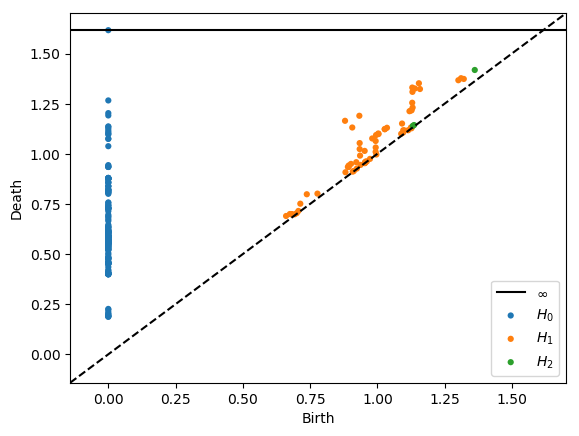

1
2
starting
['-0.231', '-0.233', '-0.234', '-0.232', '-0.224', '-0.213', '-0.202', '-0.193', '-0.184', '-0.173', '-0.16', '-0.153', '-0.149', '-0.143', '-0.137', '-0.129', '-0.112', '-0.084', '-0.055', '-0.036', '-0.032', '-0.027', '-0.009', '0.01', '0.028', '0.04', '0.048', '0.064', '0.082', '0.106', '0.13', '0.149', '0.144', '0.113', '0.078', '0.043', '0.019', '0.0', '-0.02', '-0.055', '-0.094', '-0.128', '-0.143', '-0.179', '-0.223', '-0.28', '-0.336', '-0.379', '-0.393', '-0.395', '-0.396', '-0.414', '-0.451', '-0.502', '-0.563', '-0.641', '-0.739', '-0.867', '-1.02', '-1.167', '-1.296', '-1.403', '-1.477', '-1.519', '-1.537', '-1.519', '-1.47', '-1.372', '-1.249', '-1.124', '-1.004', '-0.901', '-0.825', '-0.767', '-0.724', '-0.711', '-0.689', '-0.675', '-0.667', '-0.657', '-0.642', '-0.633', '-0.623', '-0.617', '-0.633', '-0.665', '-0.697', '-0.721', '-0.737', '-0.739', '-0.727', '-0.692', '-0.632', '-0.544', '-0.438', '-0.33', '-0.231', '-0.146', '-0.078', '-0.025', '0.02', '0.0

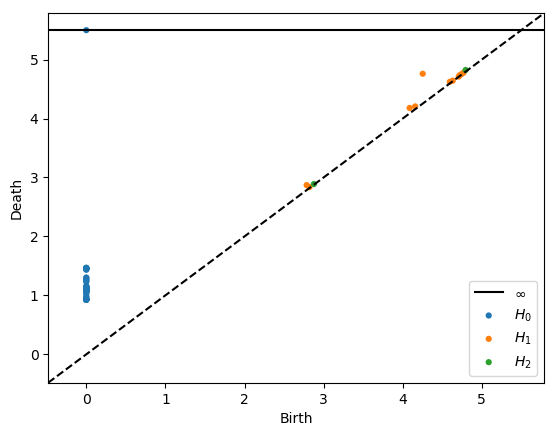

1
2
starting
['0.393', '0.331', '0.295', '0.259', '0.225', '0.196', '0.162', '0.121', '0.091', '0.071', '0.052', '0.029', '0.001', '-0.039', '-0.087', '-0.13', '-0.173', '-0.211', '-0.243', '-0.278', '-0.317', '-0.354', '-0.38', '-0.396', '-0.413', '-0.429', '-0.453', '-0.486', '-0.512', '-0.533', '-0.552', '-0.569', '-0.584', '-0.601', '-0.618', '-0.627', '-0.635', '-0.641', '-0.645', '-0.647', '-0.649', '-0.652', '-0.652', '-0.651', '-0.65', '-0.65', '-0.647', '-0.641', '-0.634', '-0.629', '-0.625', '-0.619', '-0.612', '-0.605', '-0.596', '-0.585', '-0.573', '-0.56', '-0.543', '-0.52', '-0.502', '-0.491', '-0.483', '-0.476', '-0.472', '-0.468', '-0.467', '-0.468', '-0.473', '-0.479', '-0.484', '-0.488', '-0.493', '-0.498', '-0.502', '-0.504', '-0.505', '-0.503', '-0.5', '-0.496', '-0.492', '-0.489', '-0.486', '-0.483', '-0.481', '-0.478', '-0.477', '-0.477', '-0.479', '-0.48', '-0.483', '-0.487', '-0.491', '-0.495', '-0.5', '-0.505', '-0.512', '-0.523', '-0.522', '-0.506', '-0.467', 

/anaconda3/lib/python3.6/site-packages/ripser/ripser.py:104: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "did you mean to transpose?")


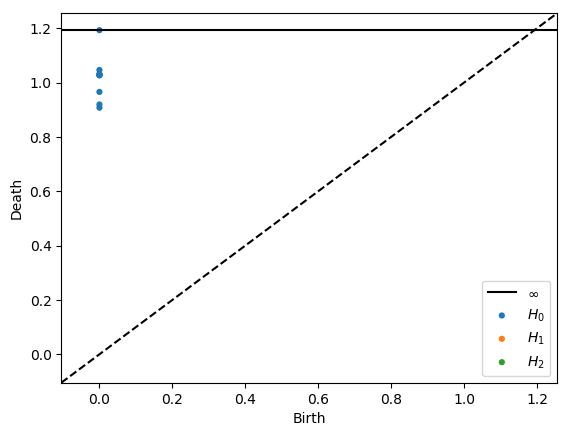

1
2
starting
[]
(0,)
[]
starting


IndexError: tuple index out of range

In [26]:
#makePersistDiagram(50,3000,"A00002",'/Users/cdunstan/Downloads/training2017/',250)
makeDiaFromCSV("Normal")